# Data Preprocessing

## Imports

In [1]:
import pandas as pd
import os
import pathlib
import matplotlib.pyplot as plt

import re

In [2]:
# relative path to data_raw
notebook_dir = pathlib.Path().resolve()
data_small_path = os.path.join(notebook_dir,'../raw_data/data_small.csv')
data_small = pd.read_csv(data_small_path)

In [3]:
data_small.head()

CM Sex  CM DOB (month)  CM DOB (year)  CM Age last birthday  \
0       1               3           2001                    13   
1       1              10           2000                    14   
2       2               5           2001                    13   
3       1              11           2000                    14   
4       2               7           2001                    13   

   Height in centimeters  Weight in kilos  Body fat percentage  \
0                  163.2             52.3                 16.5   
1                  173.6             57.1                 14.4   
2                  163.9             56.2                 26.7   
3                  167.0             51.5                 18.8   
4                  163.8             56.9                 26.7   

   IWR: Weight measurement circumstances MC (A) [Unable to stand still]  \
0                                                  0                      
1                                                  0                      
2                                                  0                      
3                                                  0                      
4                                                  0                      

   ActivGrid: Go to the cinema?  ActivGrid: Go to watch live sport?  ...  \
0                             4                                   4  ...   
1                             5                                   3  ...   
2                             4                                   3  ...   
3                             4                                   4  ...   
4                             3                                   4  ...   

   FeelingsGrid: I hated myself  FeelingsGrid: I was a bad person  \
0                             1                                 1   
1                             1                                 1   
2                             1                                 1   
3                             1                                 1   
4                             2                                 2   

   FeelingsGrid: I felt lonely  \
0                            1   
1                            1   
2                            1   
3                            1   
4                            1   

   FeelingsGrid: I thought nobody really loved me  \
0                                               1   
1                                               1   
2                                               1   
3                                               1   
4                                               1   

   FeelingsGrid: I thought I could never be as good as other kids  \
0                                                  1                
1                                                  1                
2                                                  1                
3                                                  1                
4                                                  2                

   FeelingsGrid: I did everything wrong  In the past year has CM self-harmed  \
0                                     1                                    2   
1                                     1                                    2   
2                                     1                                    2   
3                                     1                                    2   
4                                     1                                    2   

   How willing is CM to take risks  How patient is CM  \
0                                9                  8   
1                                7                  5   
2                                6                  9   
3                                6                  4   
4                                8                  8   

   How much does CM trust others  
0                              8  
1                              7  
2                 

In [4]:
data_small.shape

(11859, 187)

In [5]:
num_duplicates = data_small.duplicated().sum()

print("Number of duplicated rows:", num_duplicates)

Number of duplicated rows: 237


In [6]:
# Display duplicated rows
duplicates = data_small[data_small.duplicated()]
print("Duplicated Rows:")
print(duplicates)

Duplicated Rows:
       CM Sex  CM DOB (month)  CM DOB (year)  CM Age last birthday  \
241         1               4           2001                    14   
332         1               4           2001                    14   
359         1               7           2001                    13   
442         2               6           2001                    14   
723         1               2           2001                    14   
...       ...             ...            ...                   ...   
11704       1               5           2001                    14   
11746       2              11           2000                    14   
11796       1               3           2001                    14   
11806       1               3           2001                    14   
11826       1               4           2001                    14   

       Height in centimeters  Weight in kilos  Body fat percentage  \
241                     -1.0             -1.0                 -1.0   
33

### It appears that there are 237nr duplicated rows, a lot of these will be caused by data that is '-1' AKA 'N/A' in these rows. Let's create 3 lists for the pipeline: list_1 = numerical, list_2 = cat_ordinal, list_3 = cat_OHE

In [7]:
numerical = []
cat_ordinal = []
cat_OHE = []

In [8]:
# Display the first 10 column headings
column_headings = data_small.columns[:140].tolist()
print(column_headings)

['CM Sex', 'CM DOB (month)', 'CM DOB (year)', 'CM Age last birthday', 'Height in centimeters', 'Weight in kilos', 'Body fat percentage', 'IWR: Weight measurement circumstances MC (A) [Unable to stand still]', 'ActivGrid: Go to the cinema?', 'ActivGrid: Go to watch live sport?', 'ActivGrid: Sing in a choir or play in a band or orchestra?', 'ActivGrid: Read for enjoyment (not for school)?', 'ActivGrid: Go to youth clubs/scouts/girlguides or oth organised activities?', 'ActivGrid: Go to museums/galleries, visit historic place/stately home?', 'ActivGrid: Attend a religious service?', 'Days last week spent doing moderate to vigorous physical activity', 'Hours per WEEKDAY spent watching TV or videos on computer', 'Hours per WEEKDAY spent playing electronic games', 'Does CM have computer of their own', 'Does CM ever use the internet at home', 'Hours per week spent on social networking sites', 'Has CM has any formal cycle training', 'Area safety: safe for CM to walk/play etc within a mile/20 m

In [9]:
data_small[column_headings[0]]

0        1
1        1
2        2
3        1
4        2
        ..
11854    1
11855    2
11856    2
11857    2
11858    1
Name: CM Sex, Length: 11859, dtype: int64

In [10]:
feature_1 = data_small[column_headings[0]]
feature_1

0        1
1        1
2        2
3        1
4        2
        ..
11854    1
11855    2
11856    2
11857    2
11858    1
Name: CM Sex, Length: 11859, dtype: int64

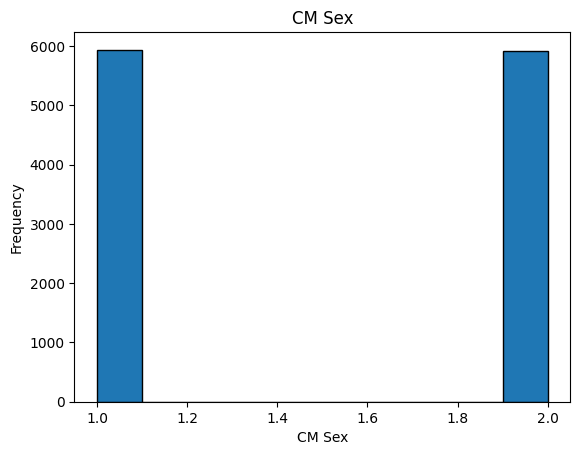

In [11]:
# Plot the histogram for numerical data
plt.hist(feature_1, edgecolor='black')  # Adjust bins as needed
plt.xlabel(feature_1.name)
plt.ylabel('Frequency')
plt.title(feature_1.name)
plt.show()

In [12]:
# Count missing values for each column
missing_values = data_small.isnull().sum()

# Sort missing values in descending order
missing_values_sorted = missing_values.sort_values(ascending=False)

print("Number of missing values for each column (ranked in descending order):")
print(missing_values_sorted)

Number of missing values for each column (ranked in descending order):
CM Sex                                                                    0
VictimisGrid: CM insulted, threatened, shouted at                         0
Do CM's friends take any illegal drugs                                    0
GamblinGrid: Placing a private bet for money (e.g. with friends)?         0
GamblinGrid: Placing a bet @ betting shop, eg football or horseracing?    0
                                                                         ..
Needs qualifications to get a job worth having                            0
How likely is it CM will remain in education at the end of year 11?       0
How likely is it CM will go to university? (Scale 0-100%)                 0
Respondent s religion (A) [England]                                       0
How much does CM trust others                                             0
Length: 187, dtype: int64


In [13]:
def find_categorical_columns(df):
    categorical_columns = []
    for column in df.columns:
        if df[column].dtype == 'object':  # Check if data type is 'object' (string)
            categorical_columns.append(column)
    return categorical_columns

In [14]:
find_categorical_columns(data_small)

[]

In [15]:
data_small[column_headings[1]]

0         3
1        10
2         5
3        11
4         7
         ..
11854    11
11855    10
11856    12
11857    10
11858     2
Name: CM DOB (month), Length: 11859, dtype: int64

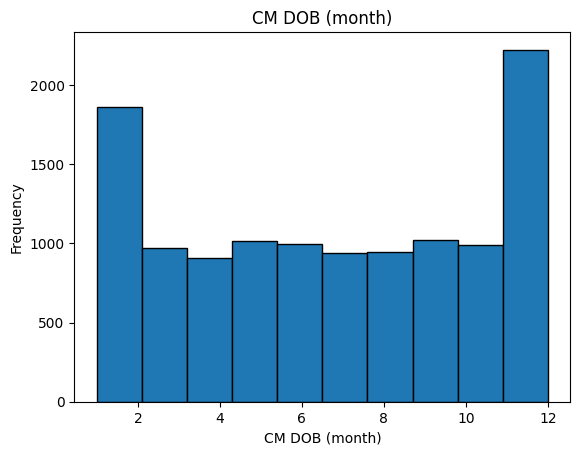

In [16]:
feature_2 = data_small[column_headings[1]]
feature_2

# Plot the histogram for numerical data
plt.hist(feature_2, edgecolor='black')  # Adjust bins as needed
plt.xlabel(feature_2.name)
plt.ylabel('Frequency')
plt.title(feature_2.name)
plt.show()

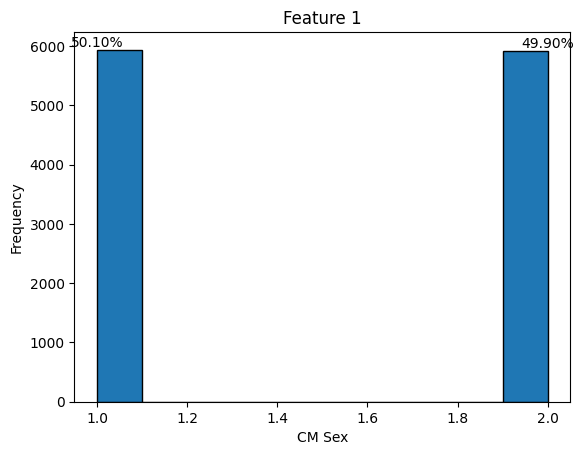

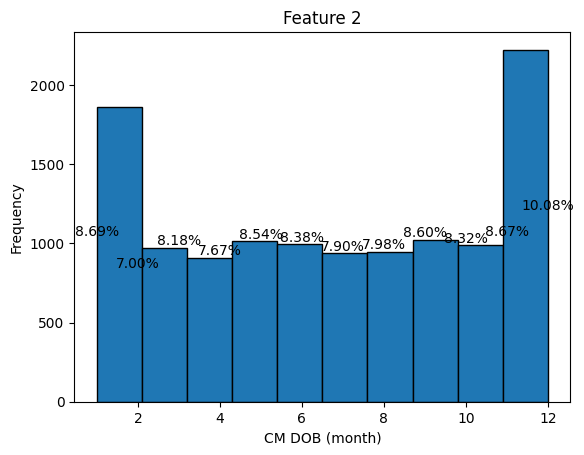

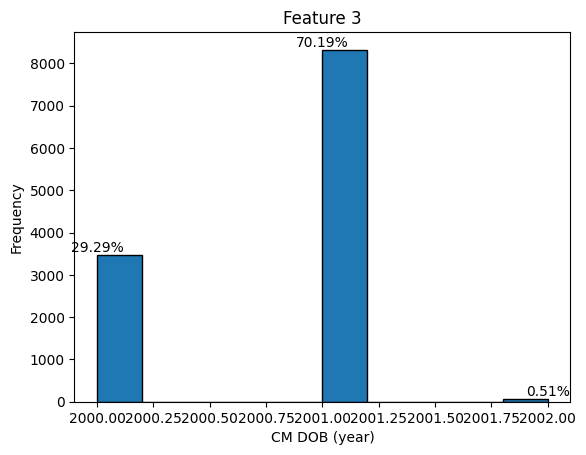

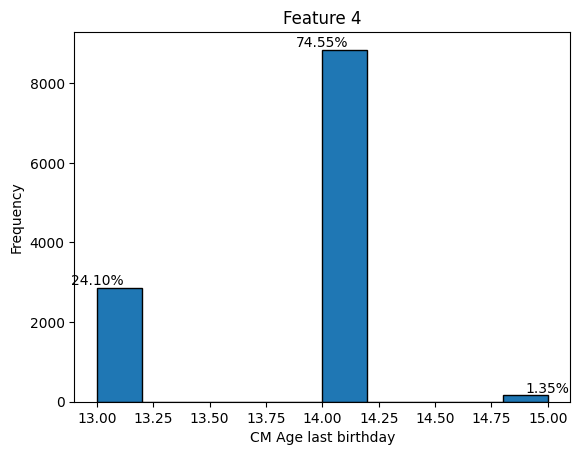

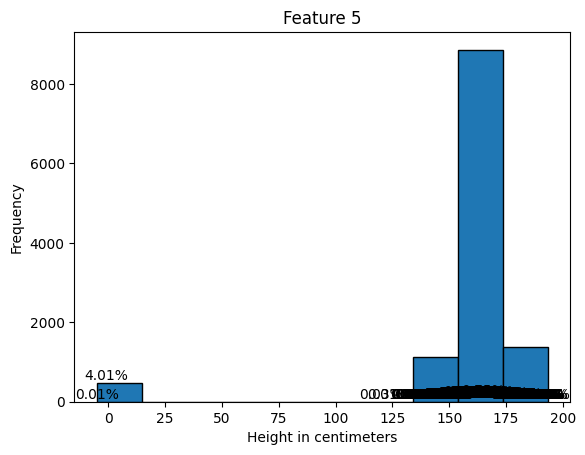

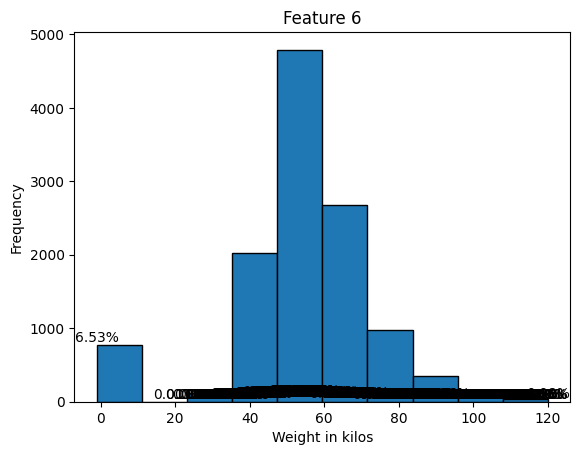

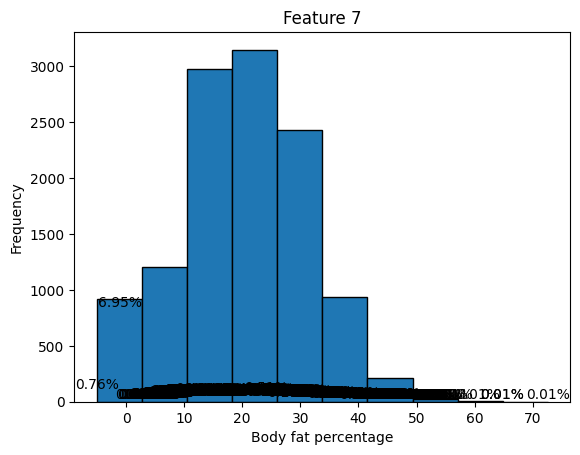

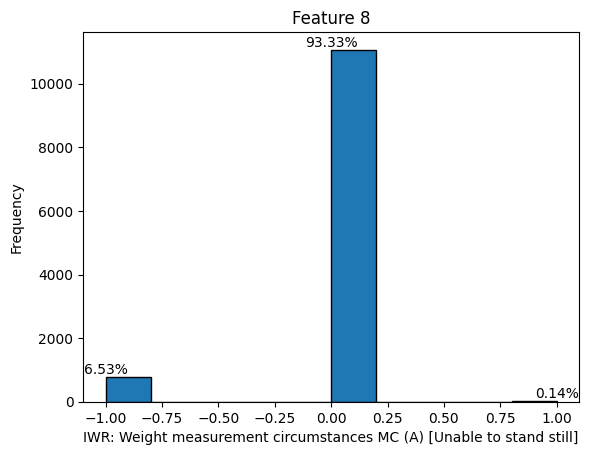

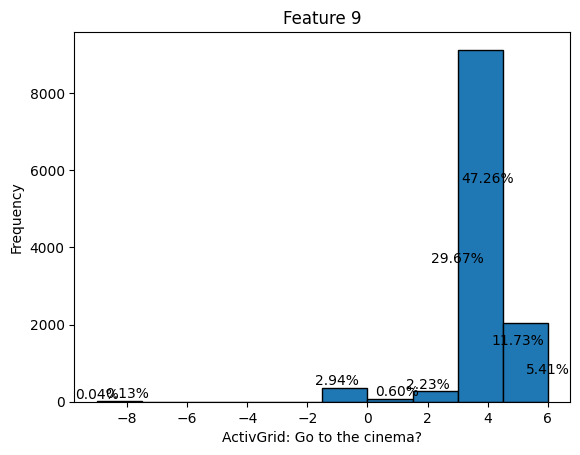

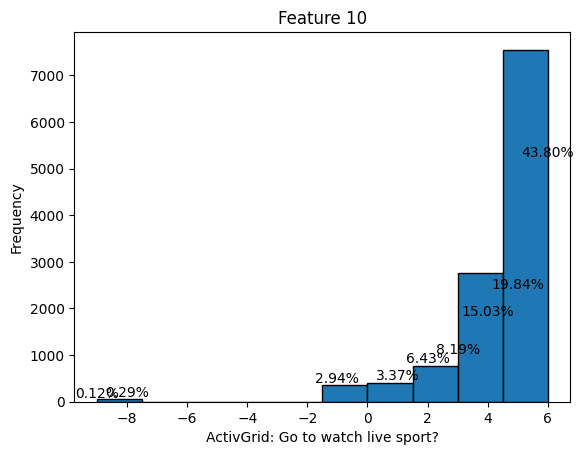

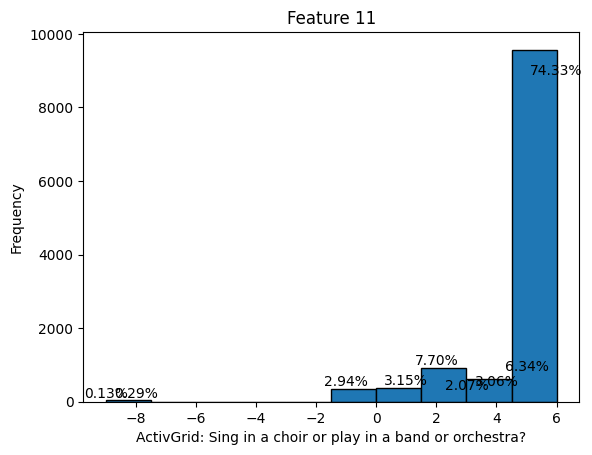

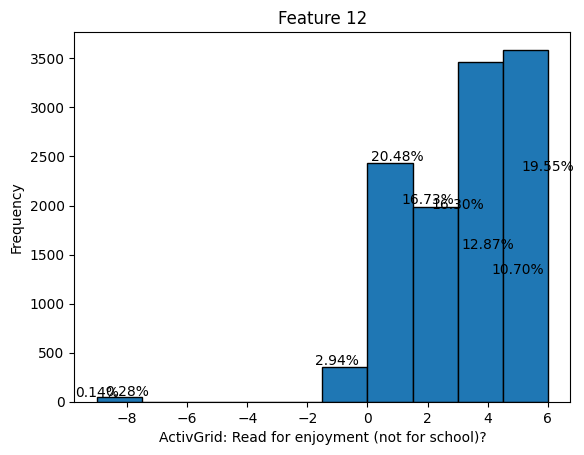

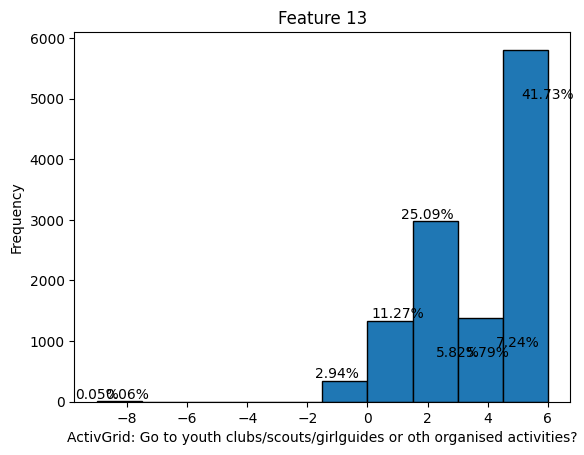

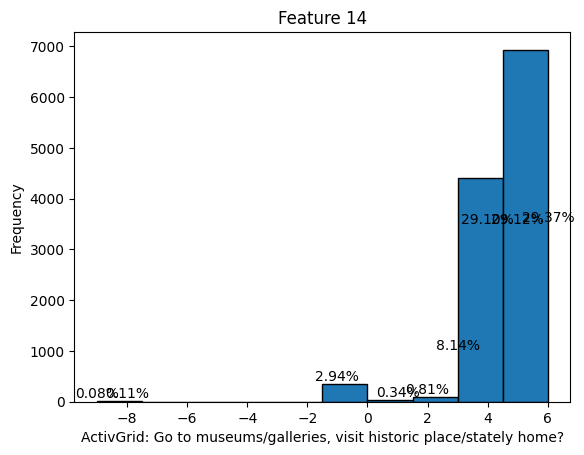

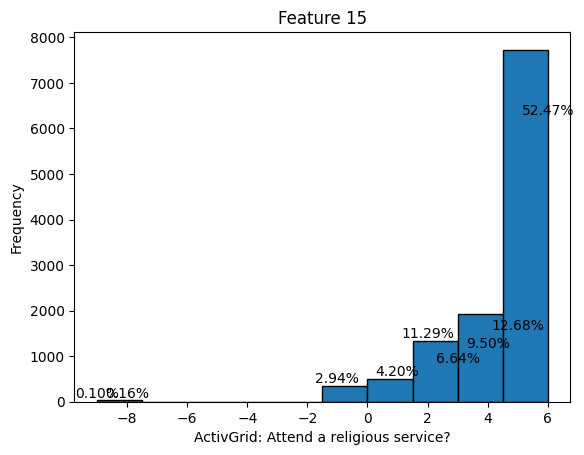

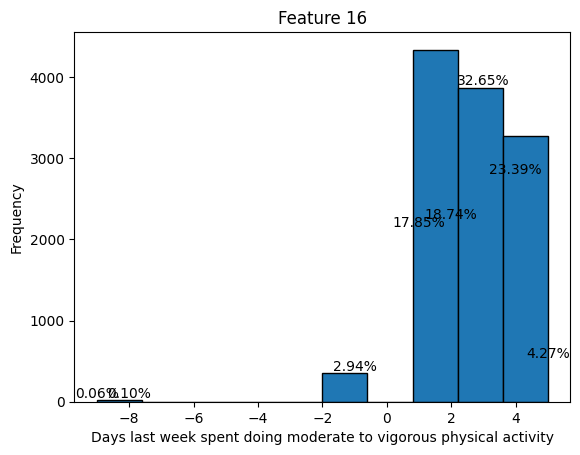

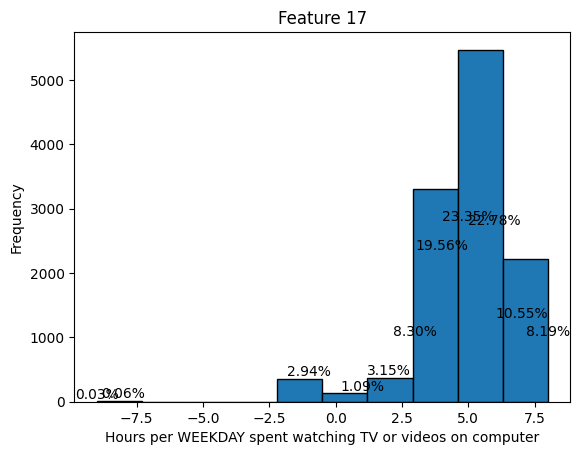

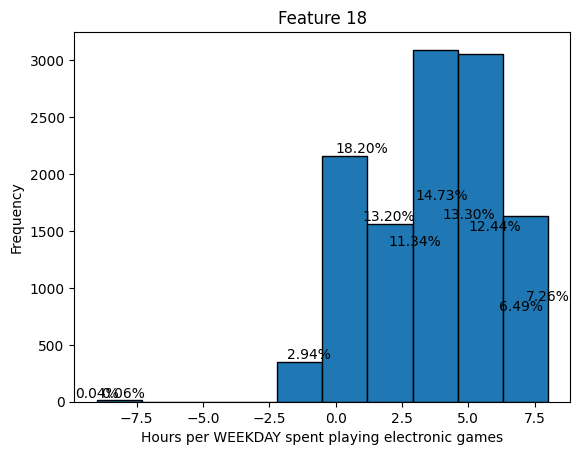

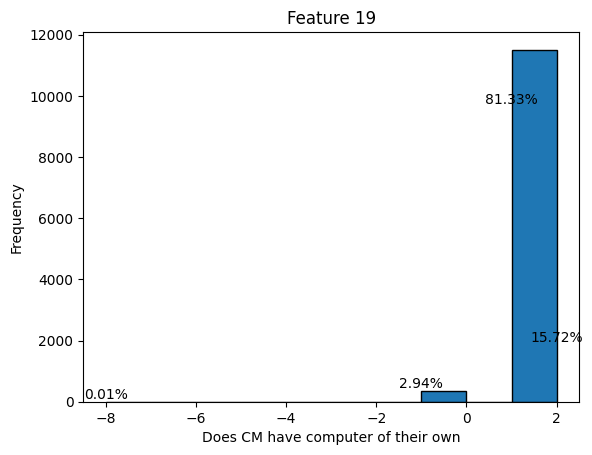

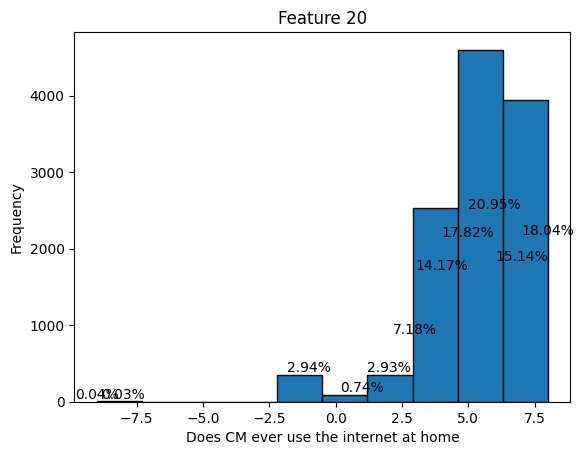

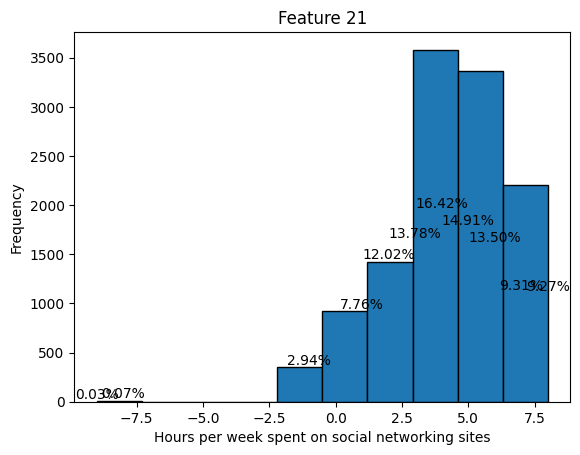

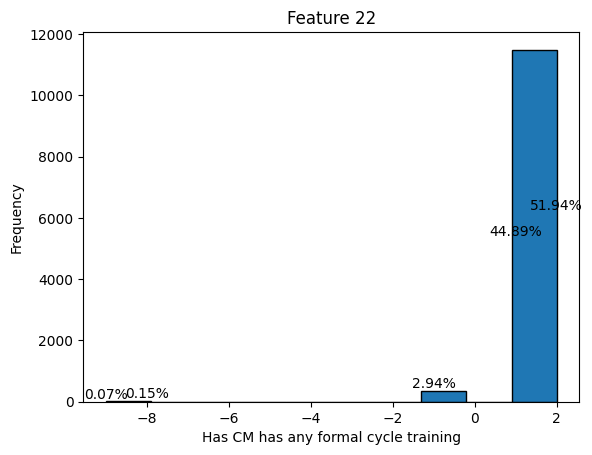

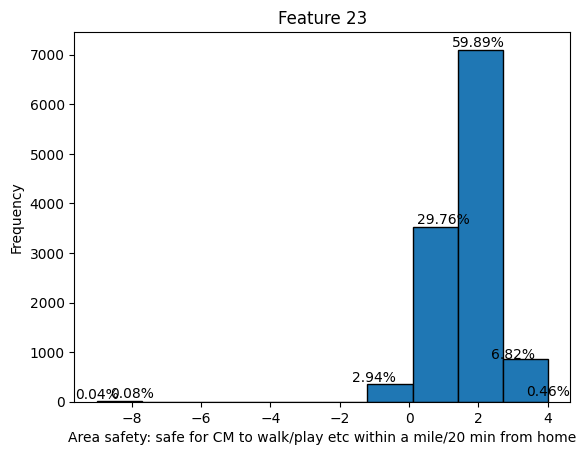

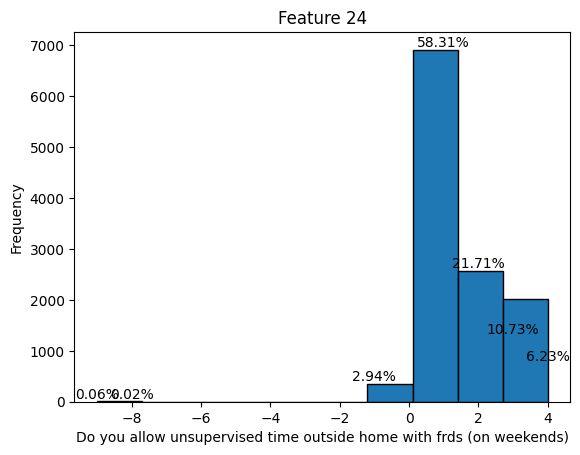

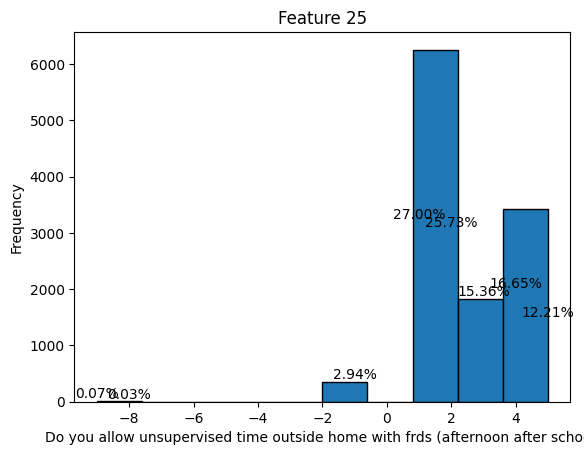

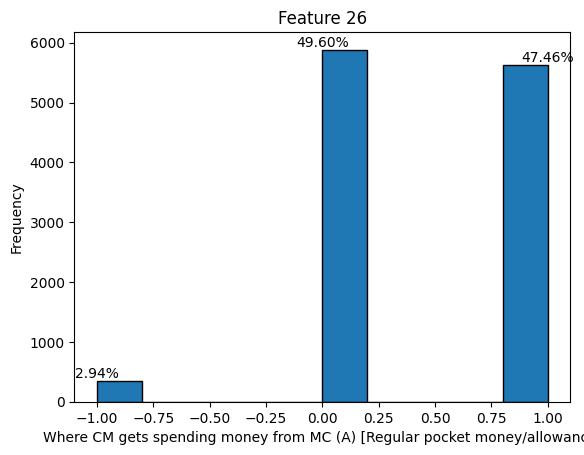

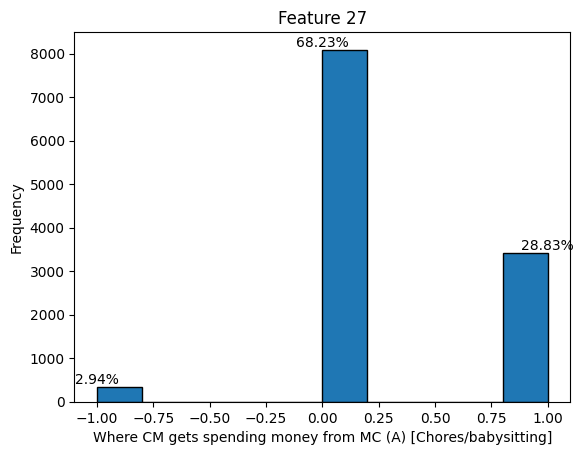

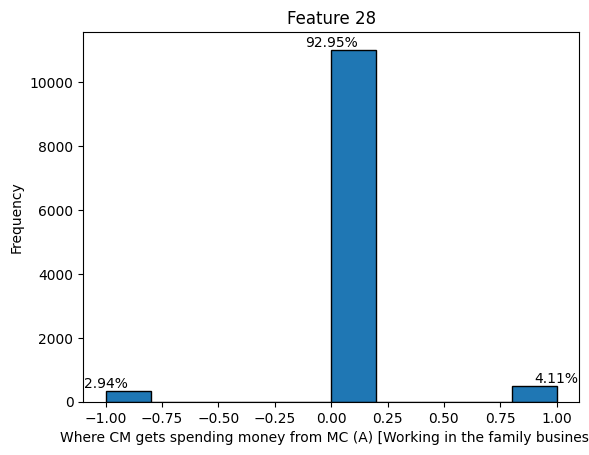

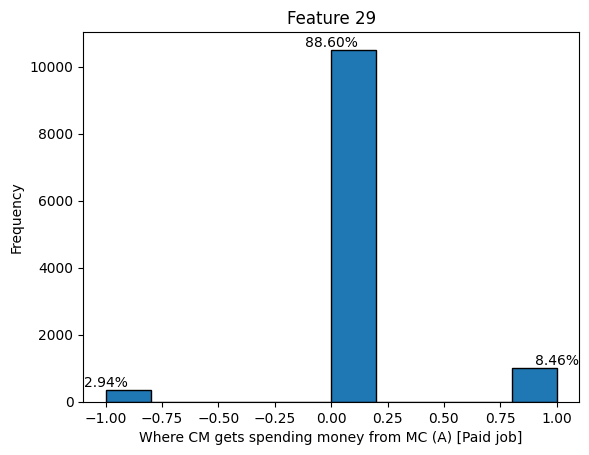

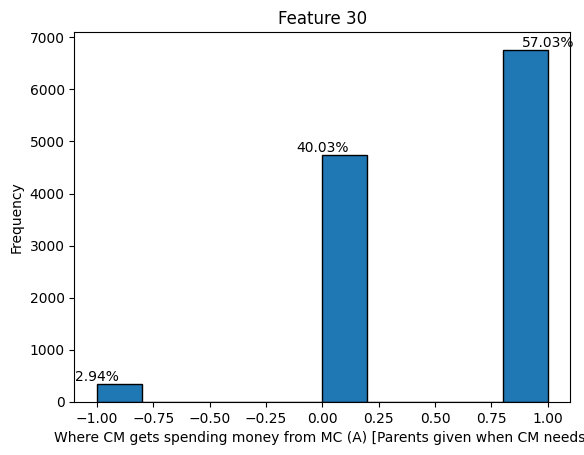

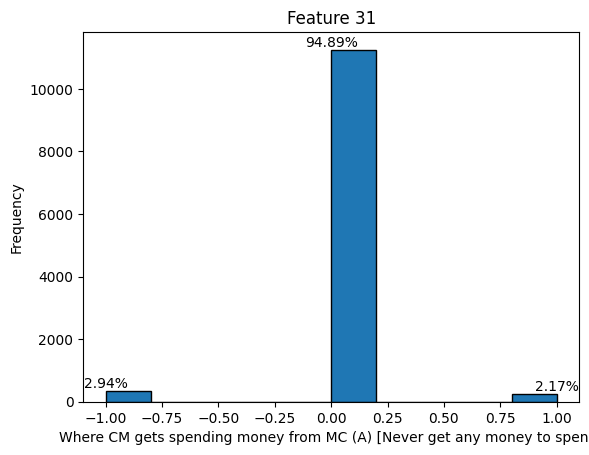

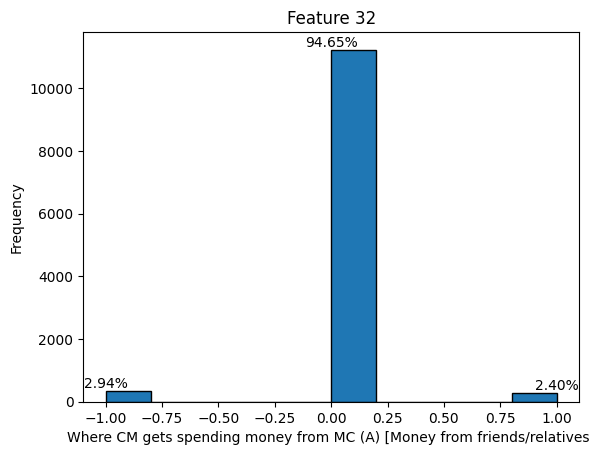

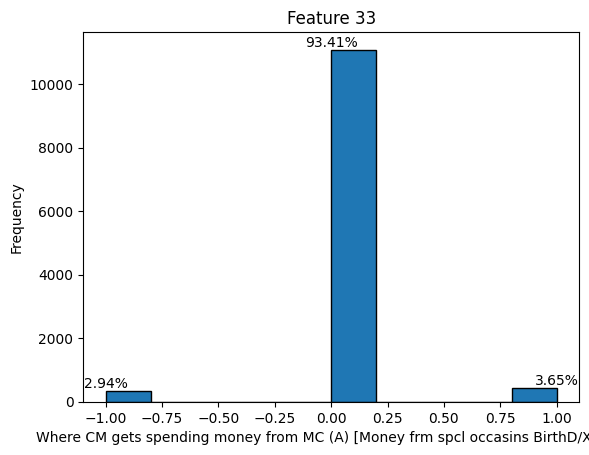

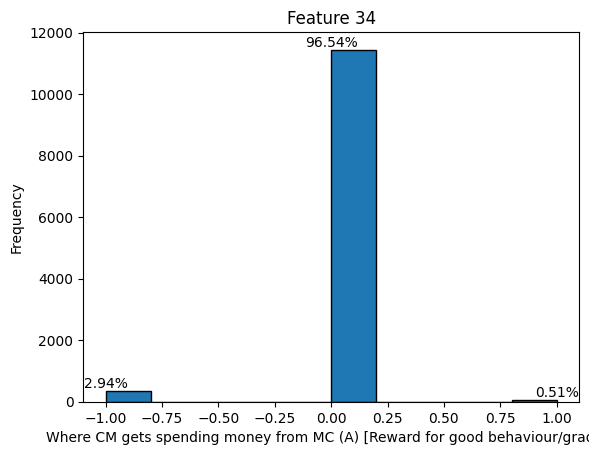

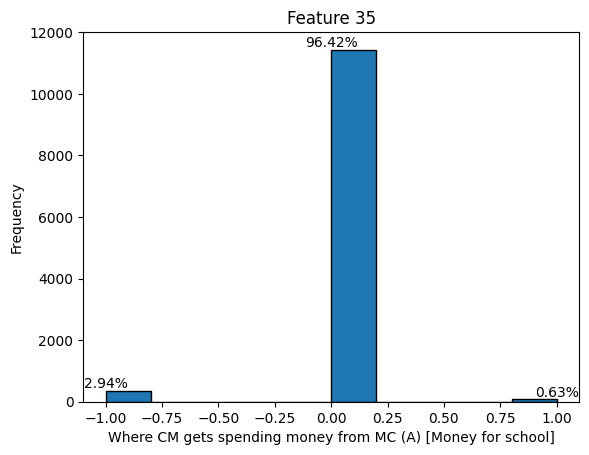

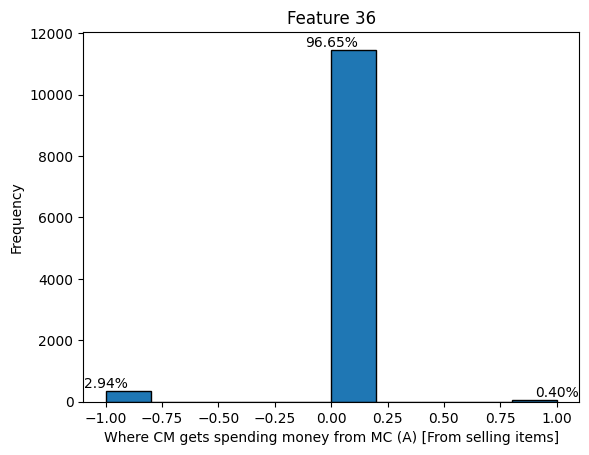

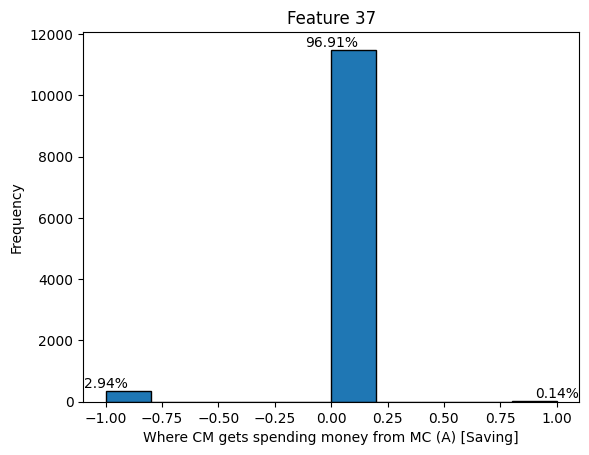

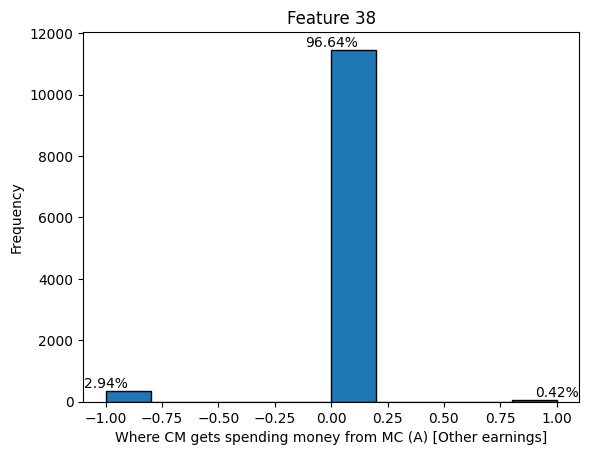

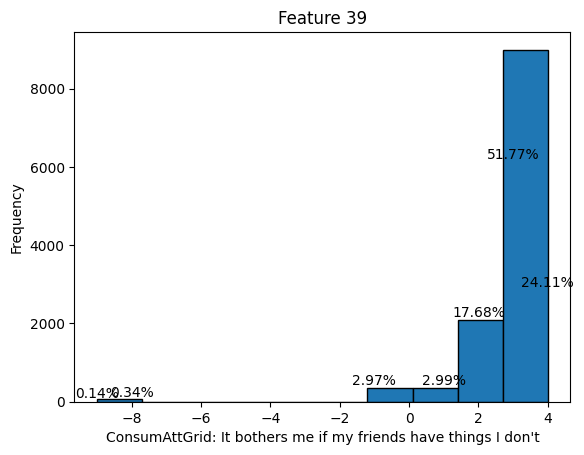

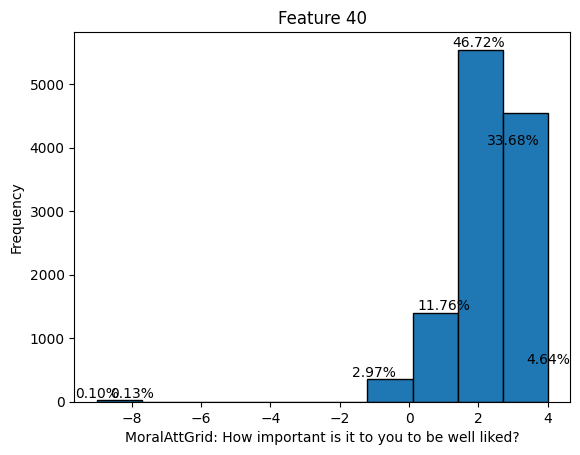

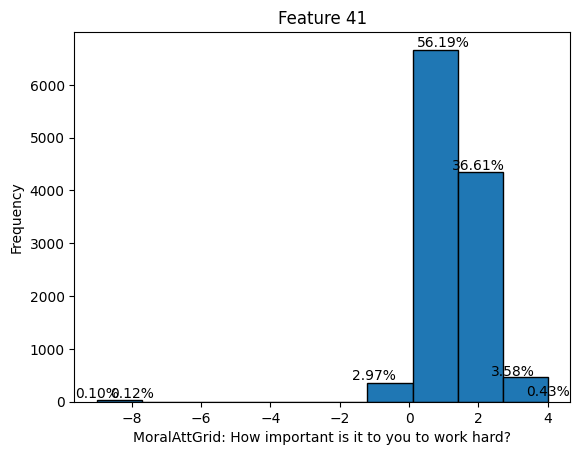

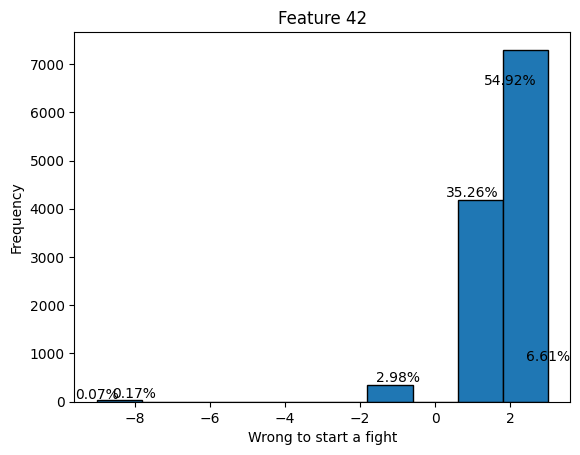

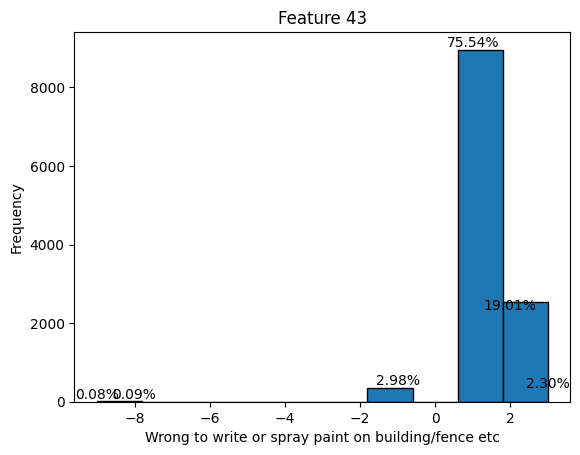

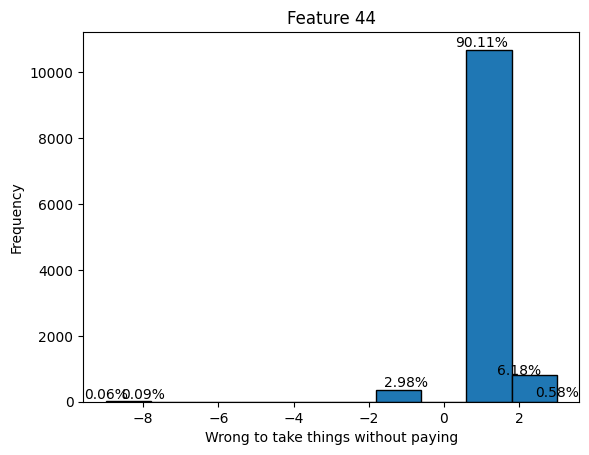

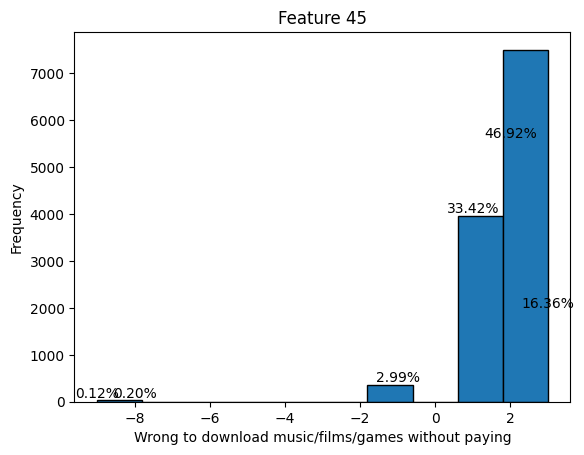

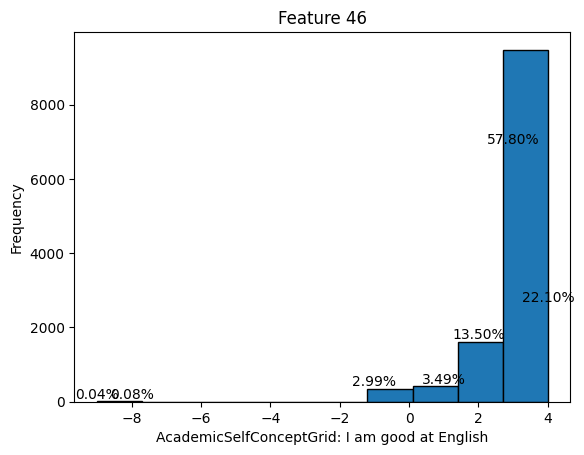

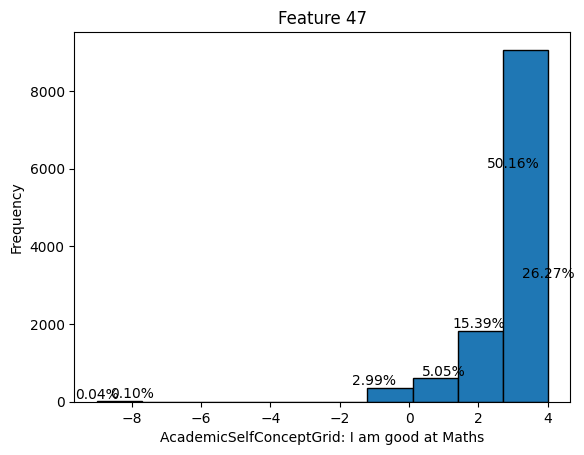

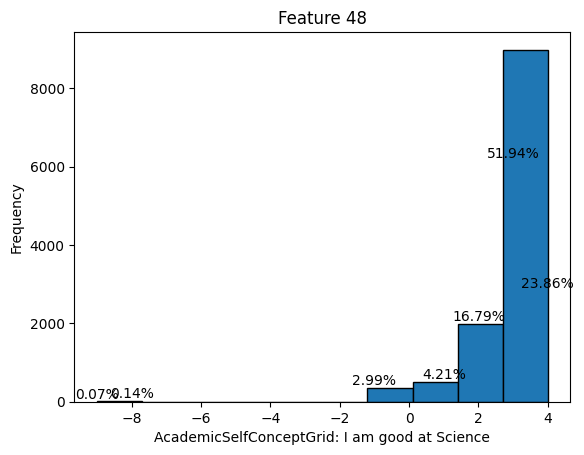

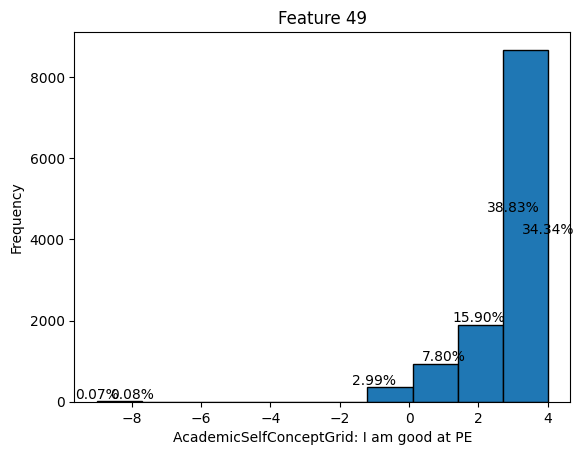

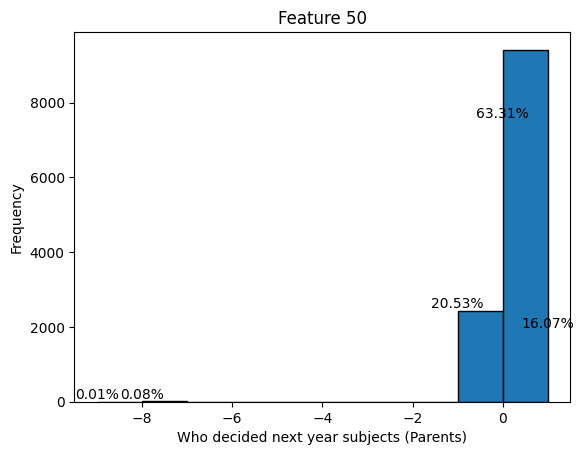

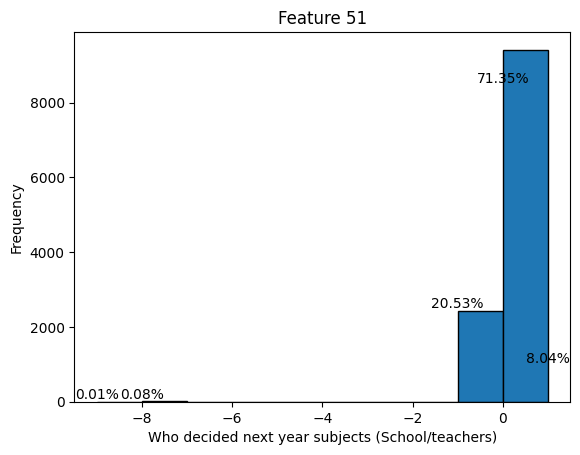

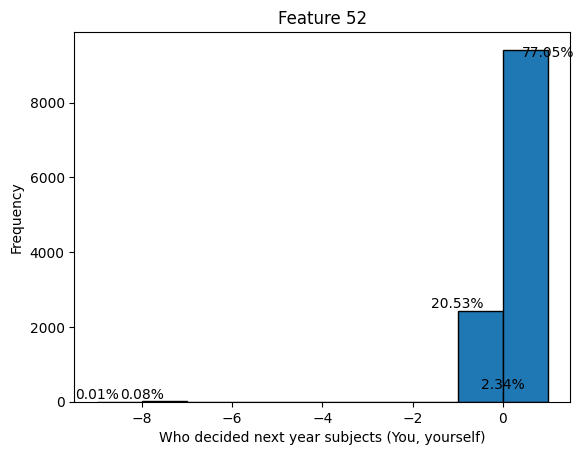

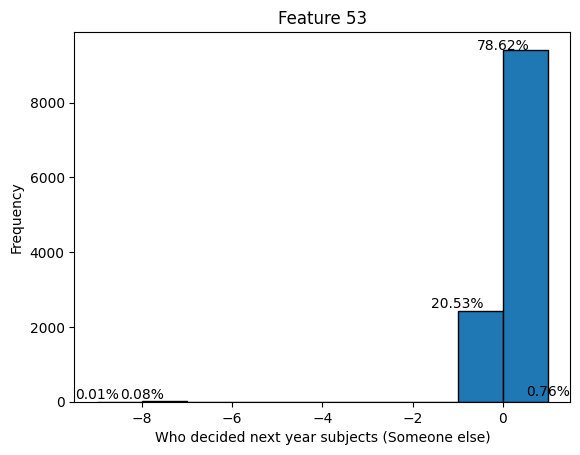

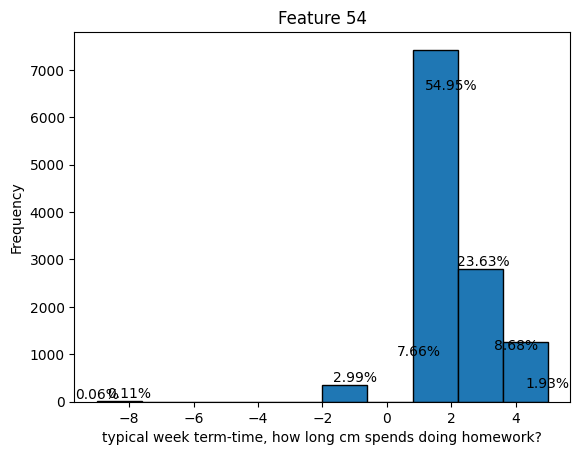

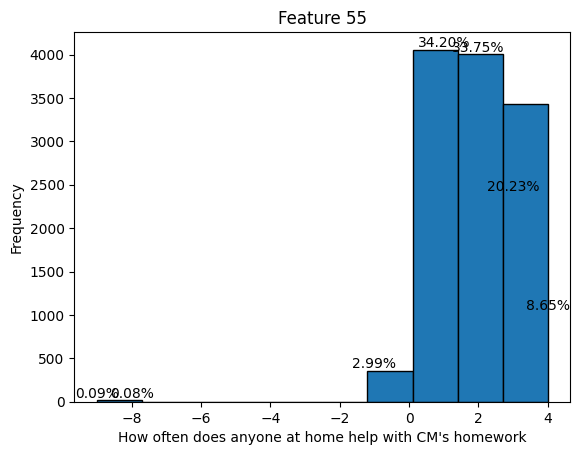

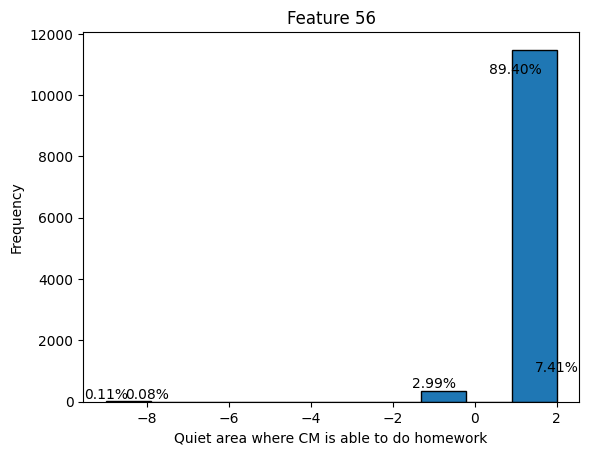

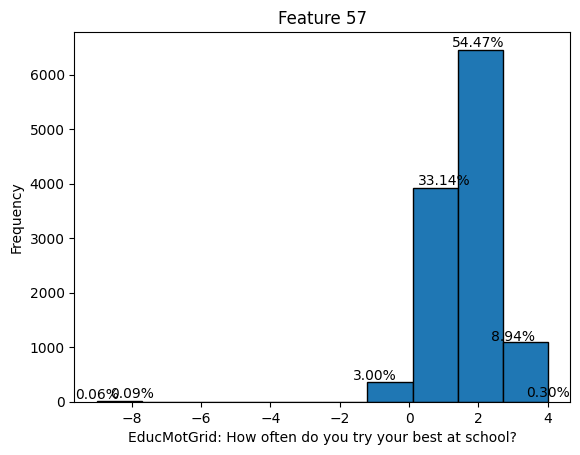

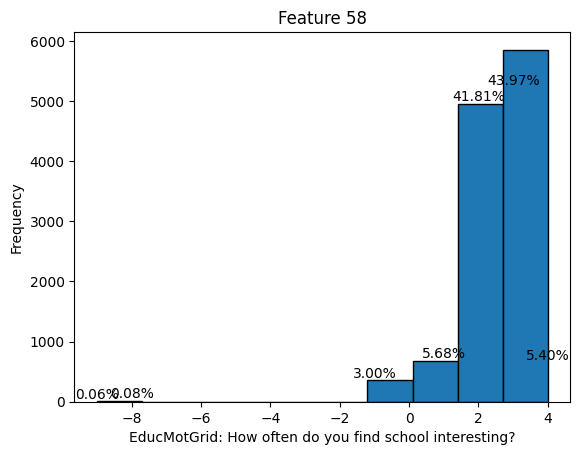

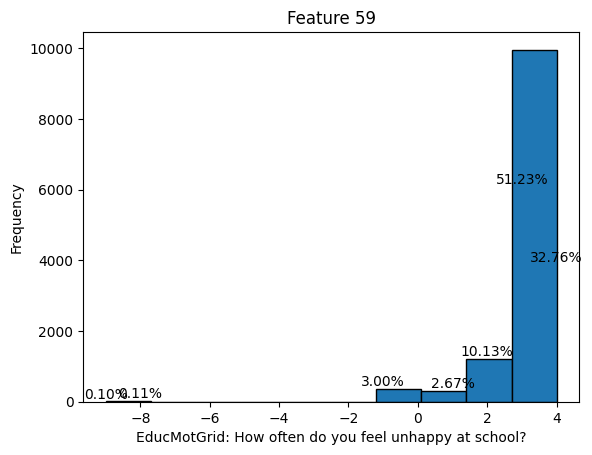

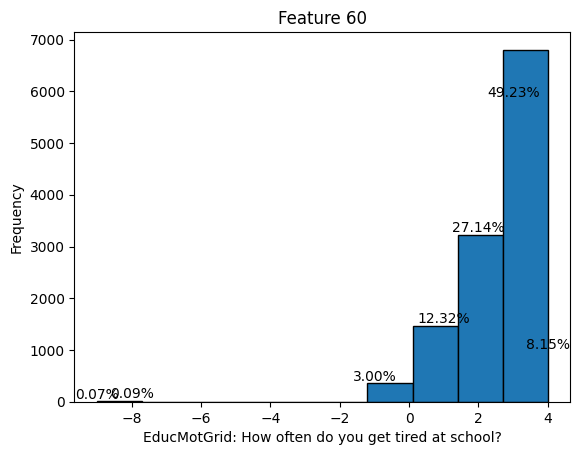

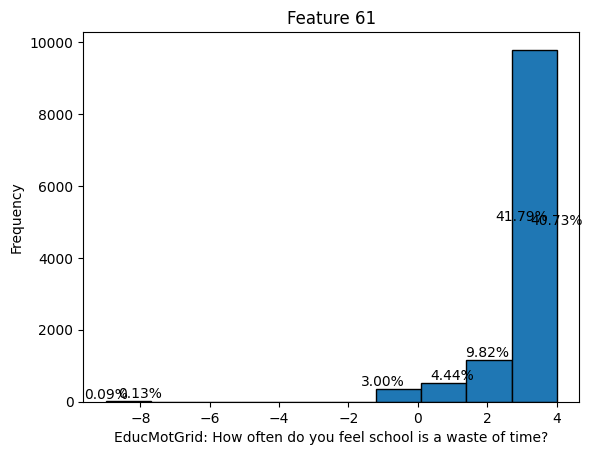

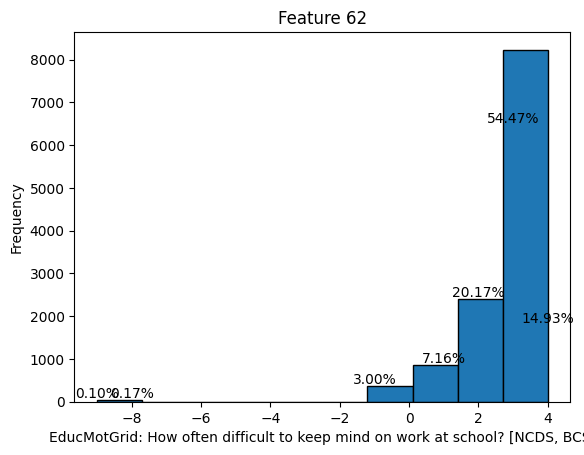

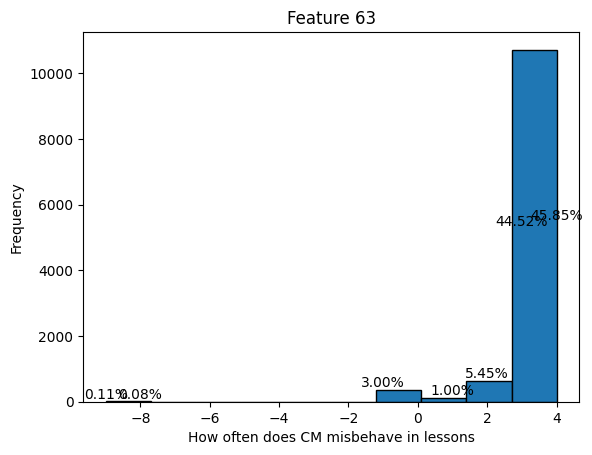

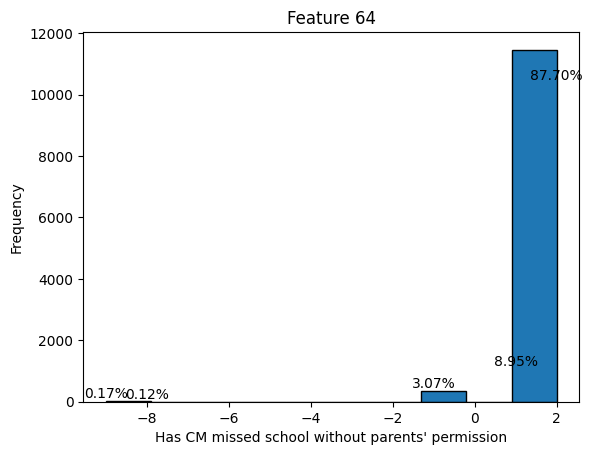

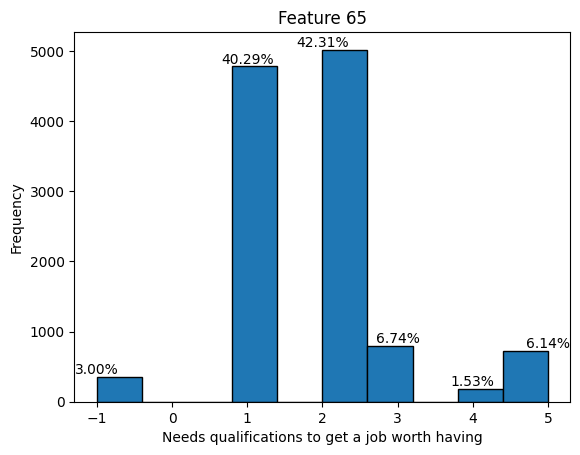

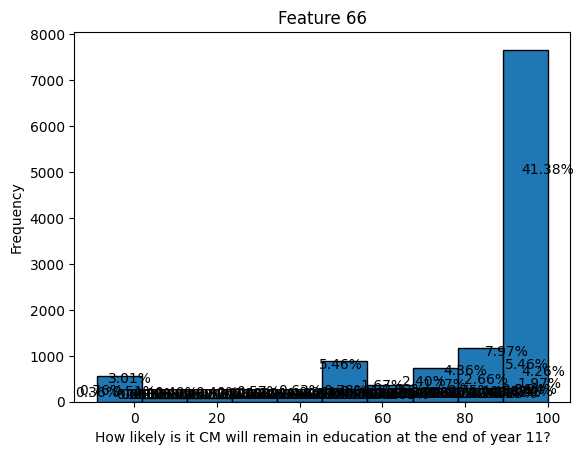

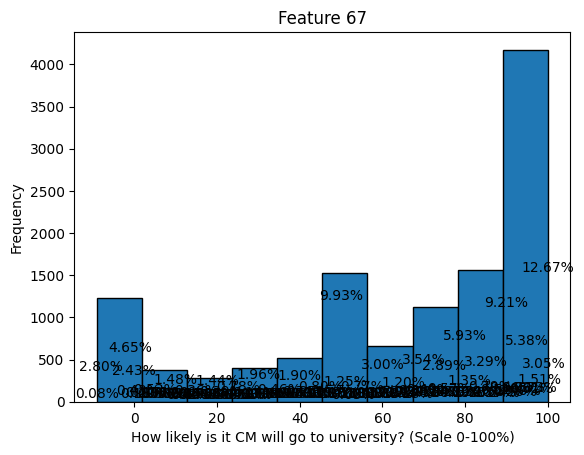

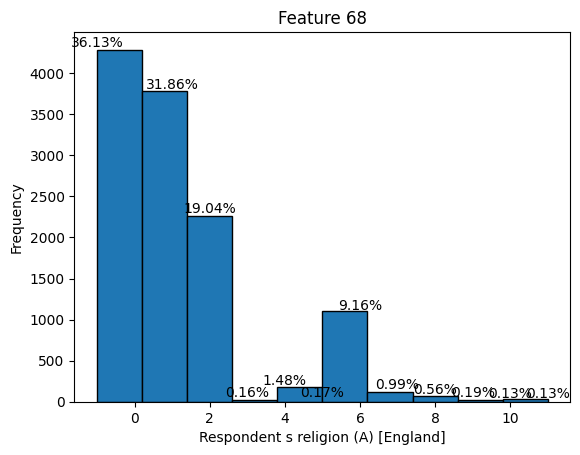

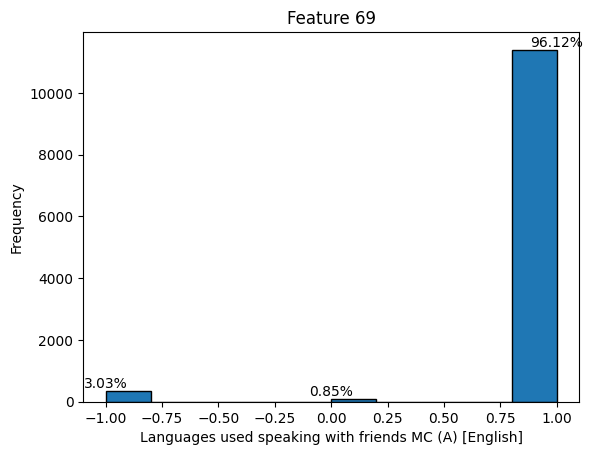

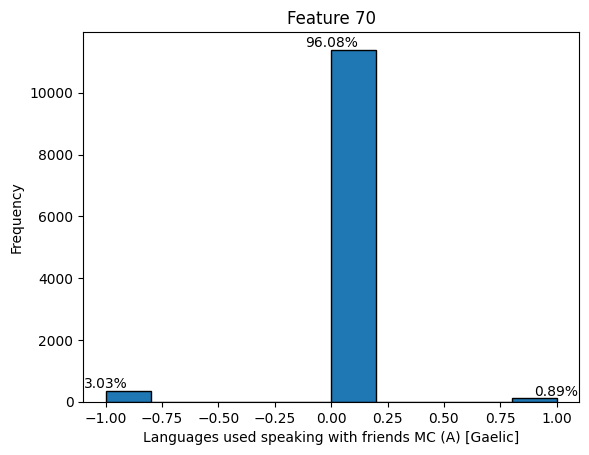

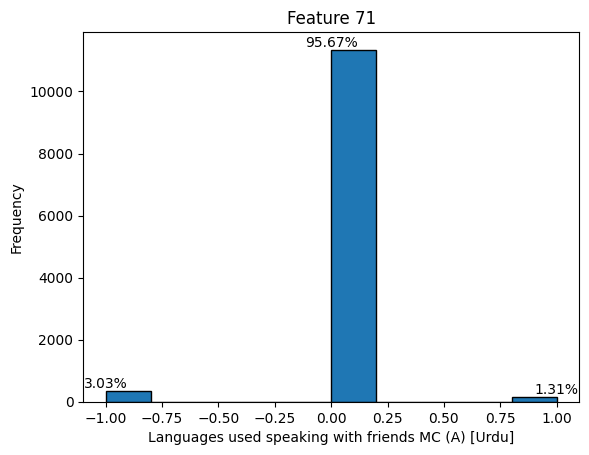

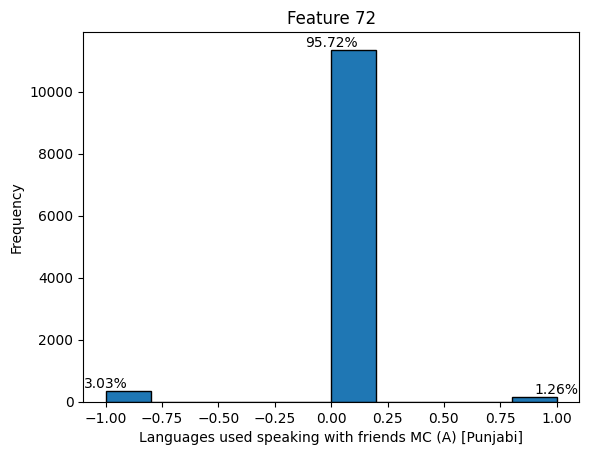

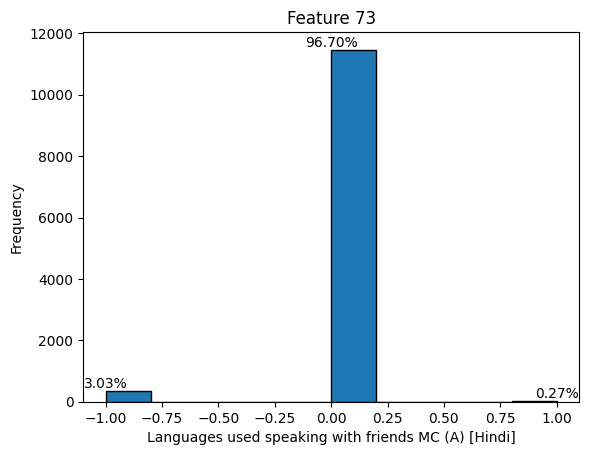

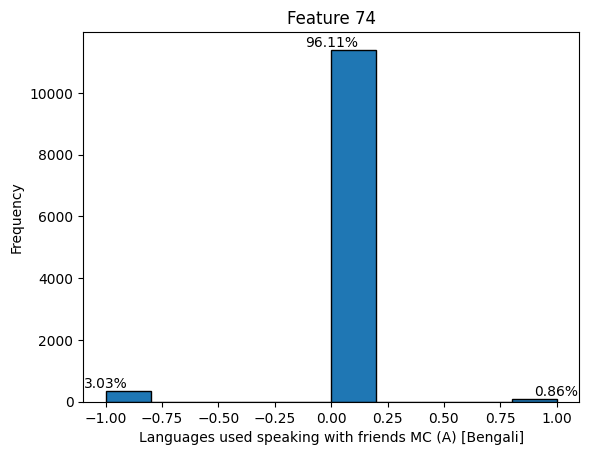

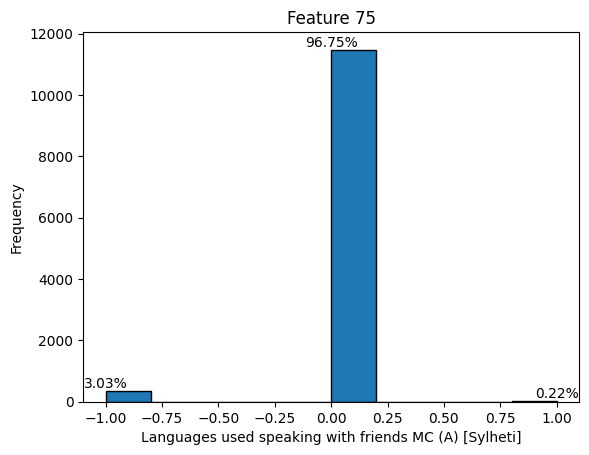

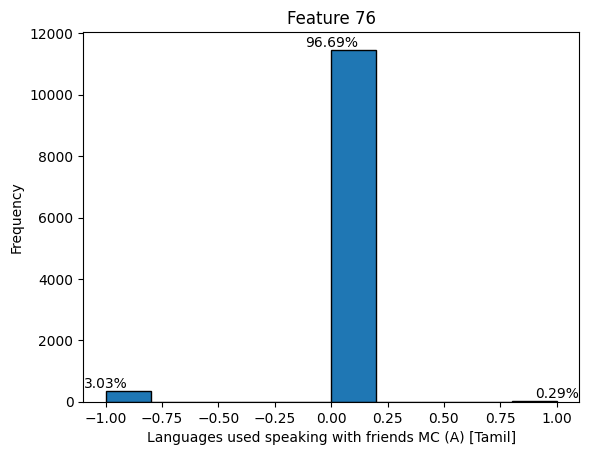

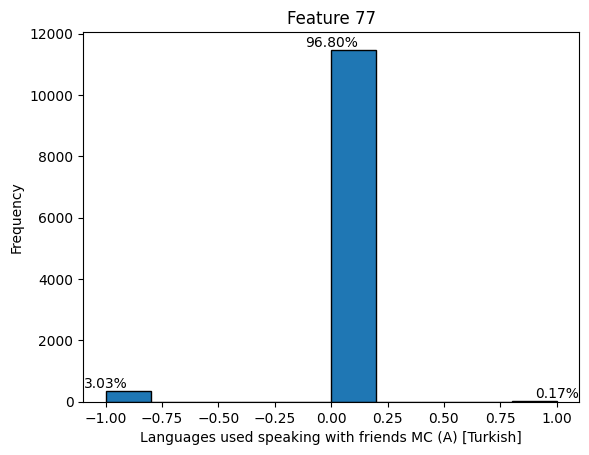

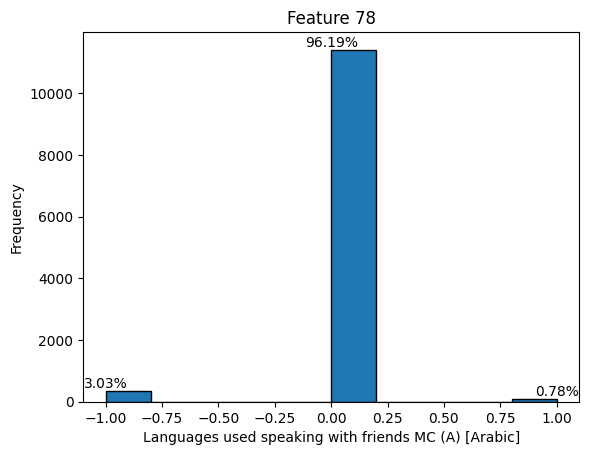

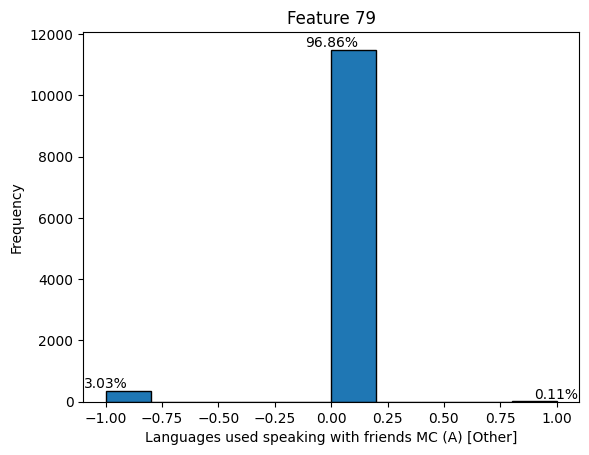

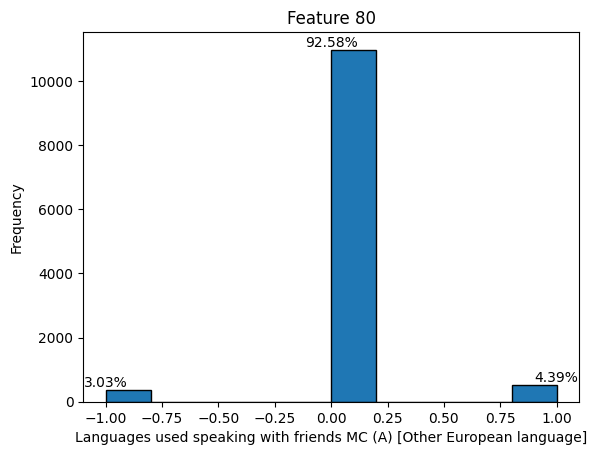

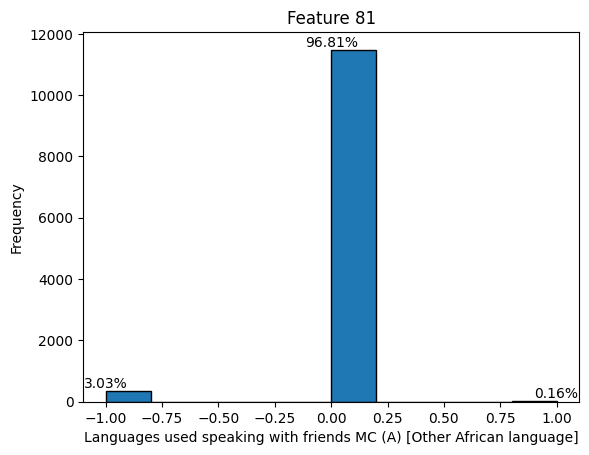

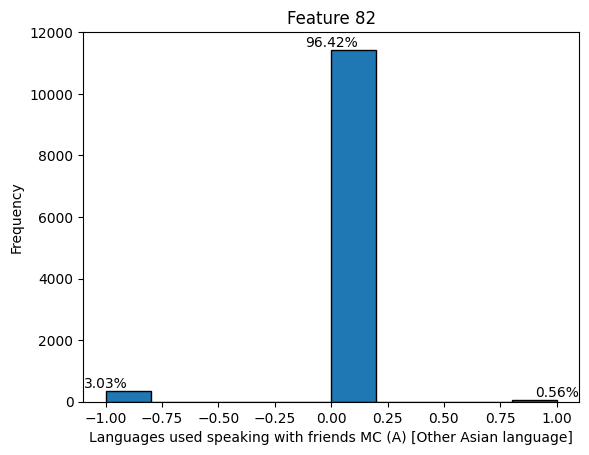

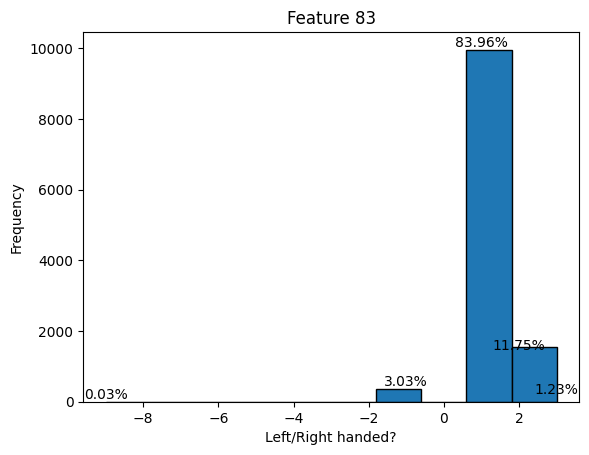

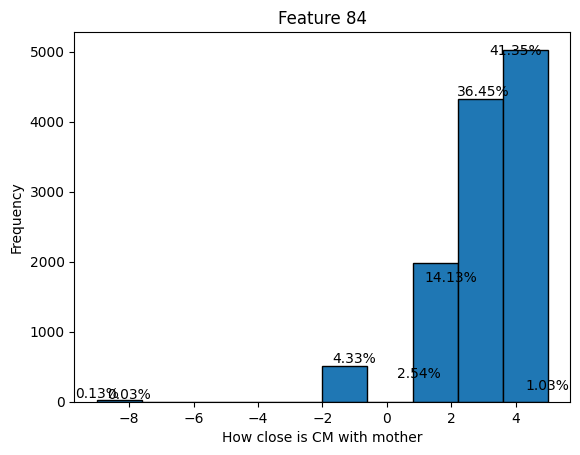

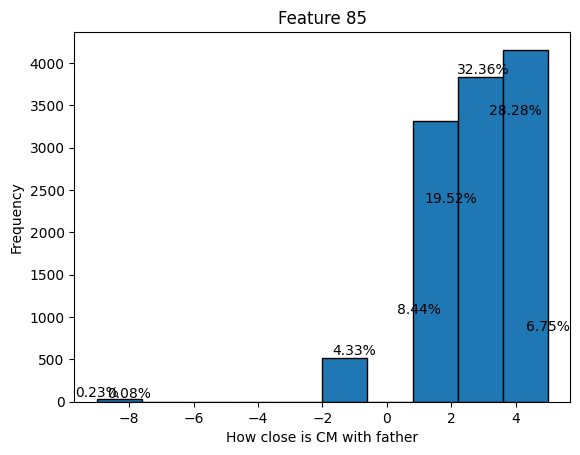

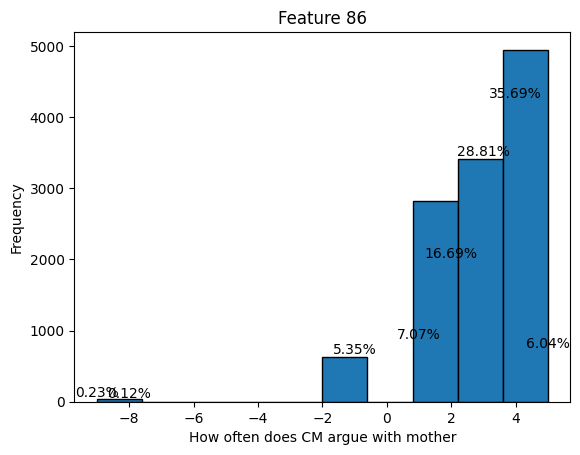

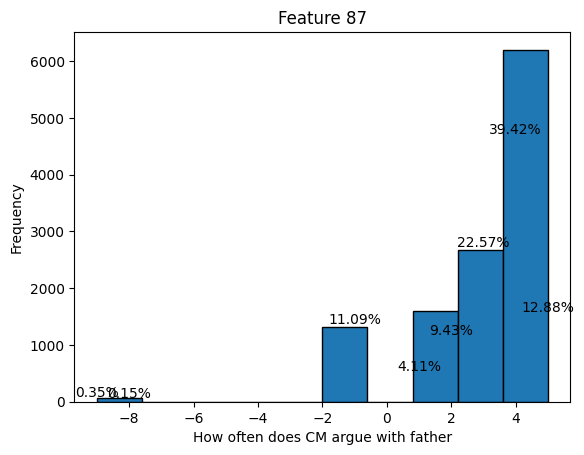

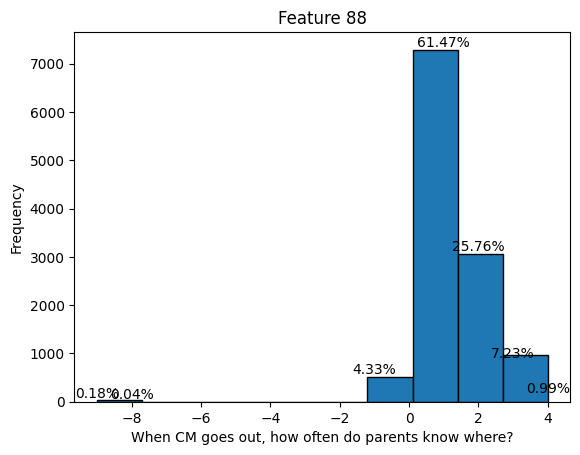

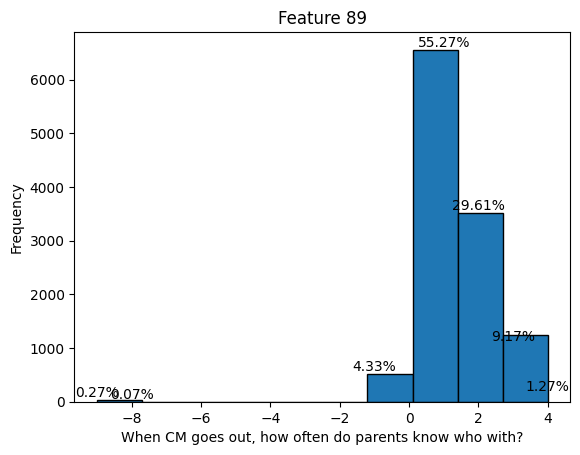

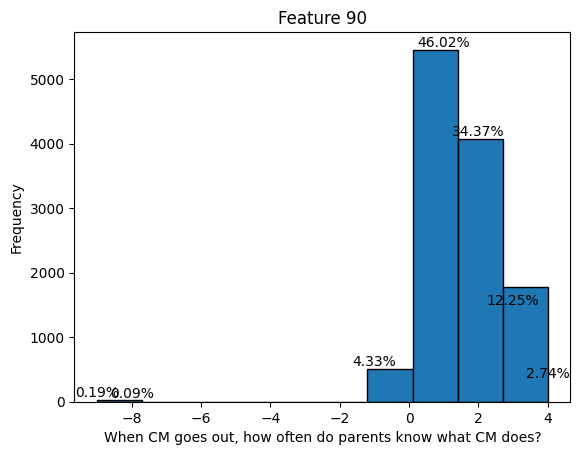

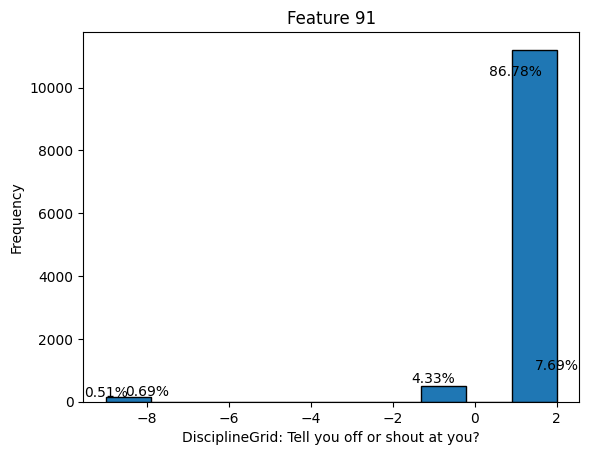

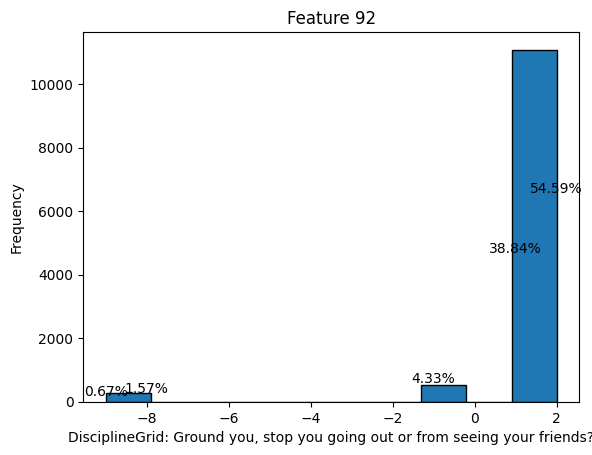

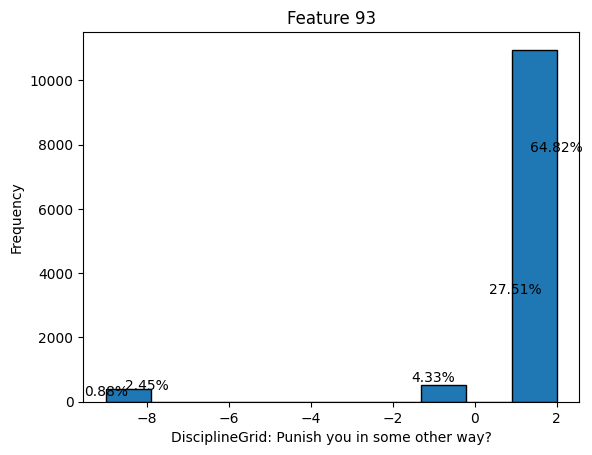

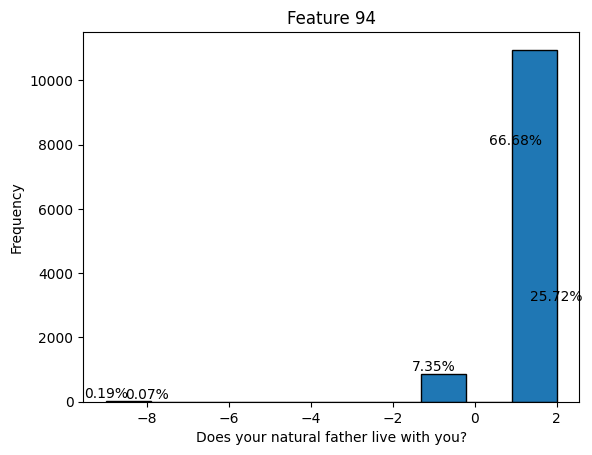

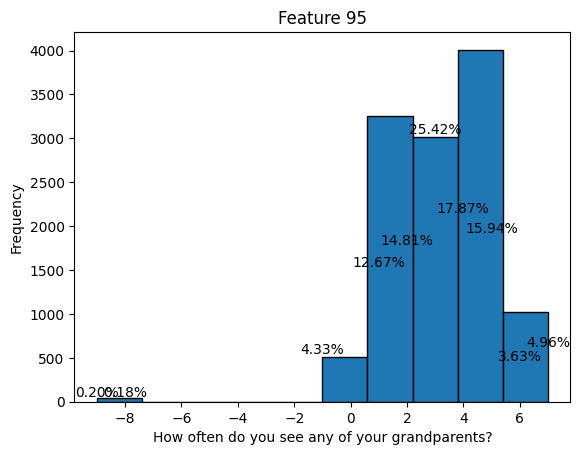

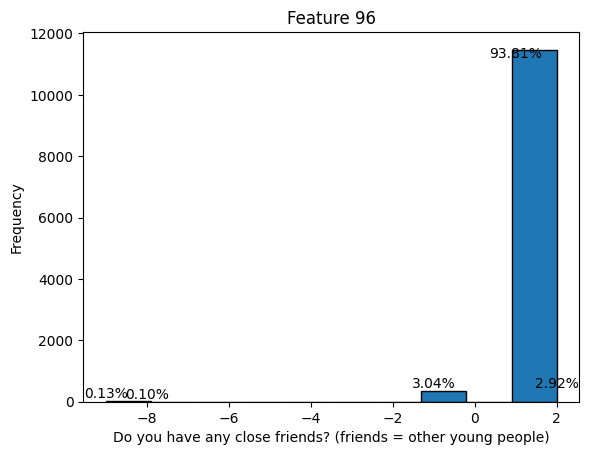

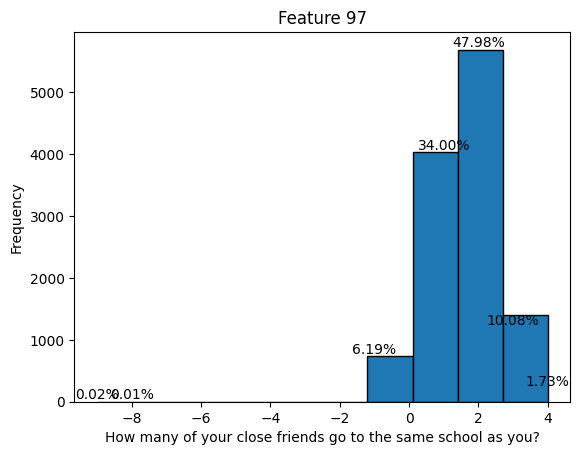

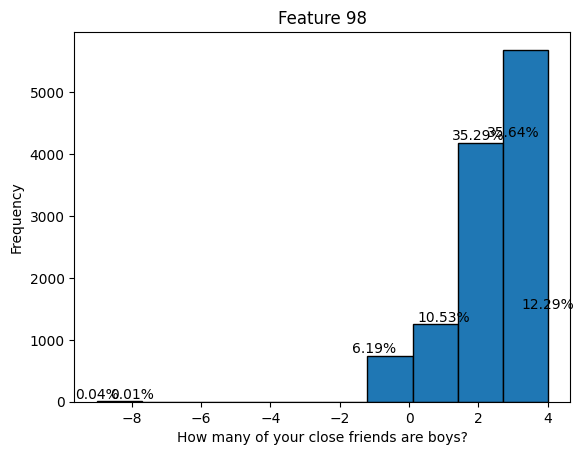

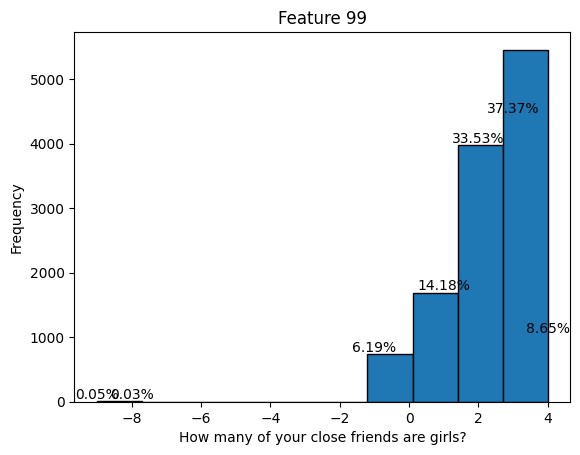

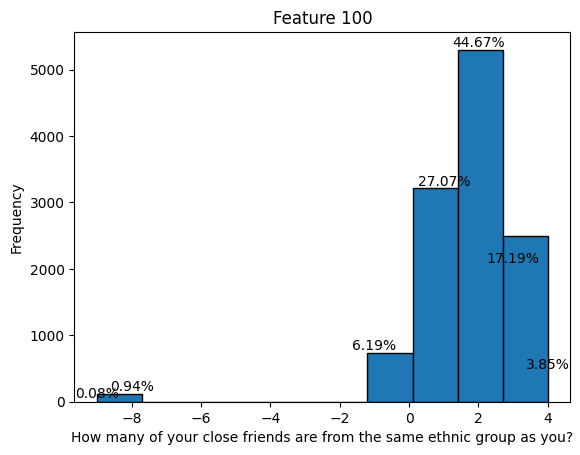

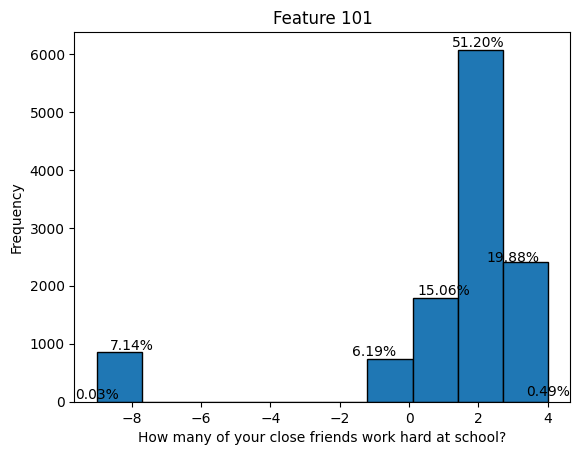

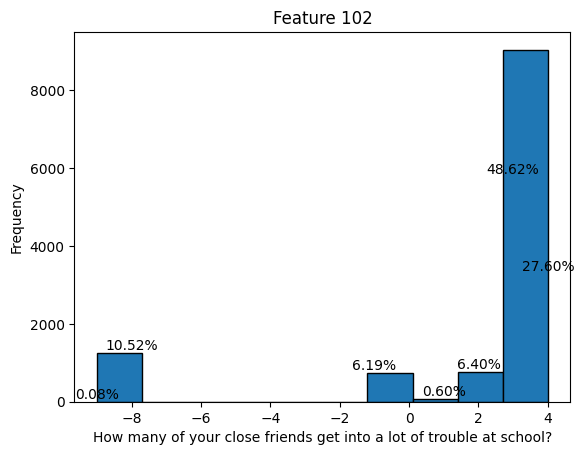

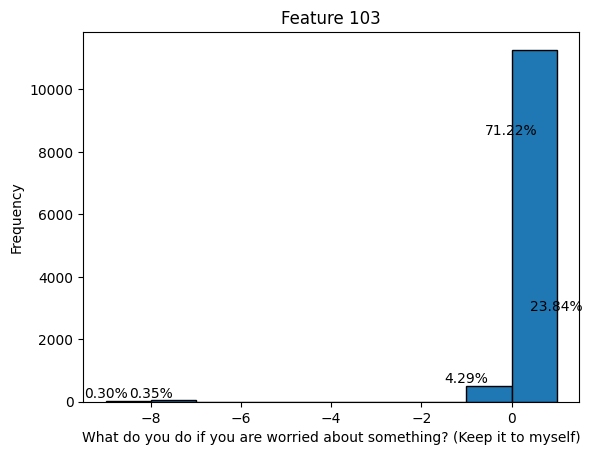

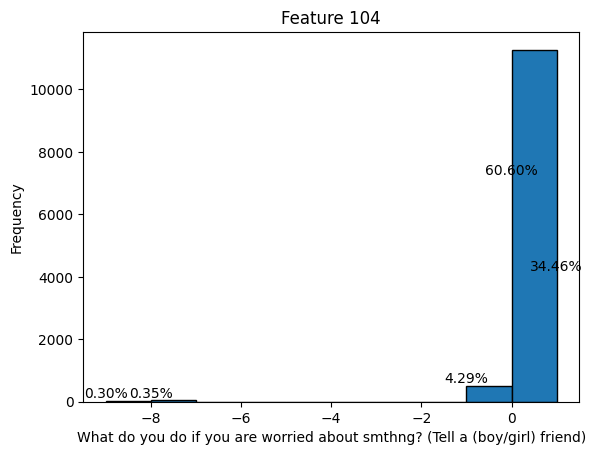

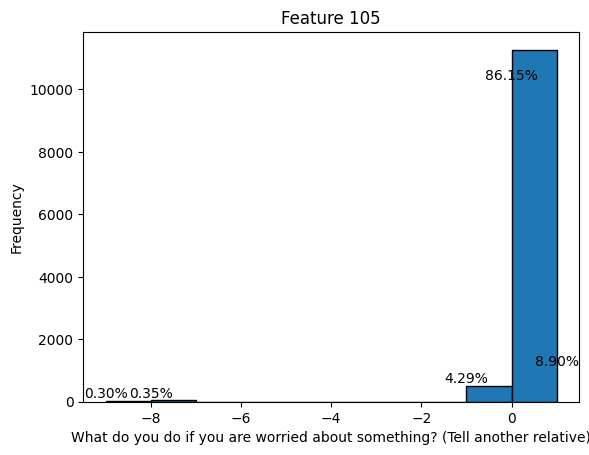

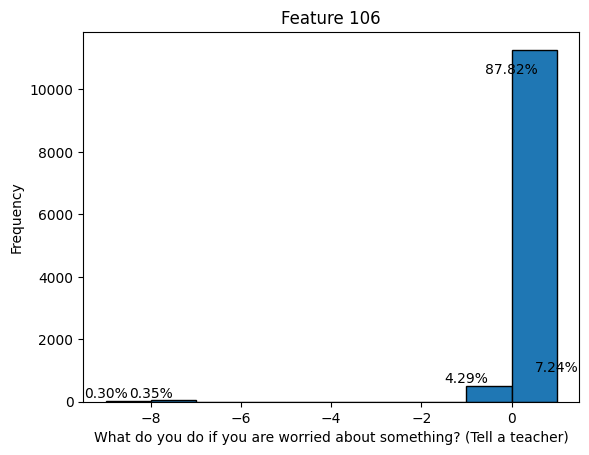

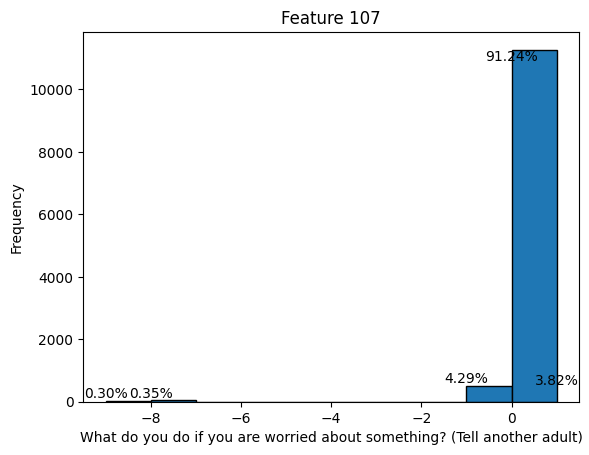

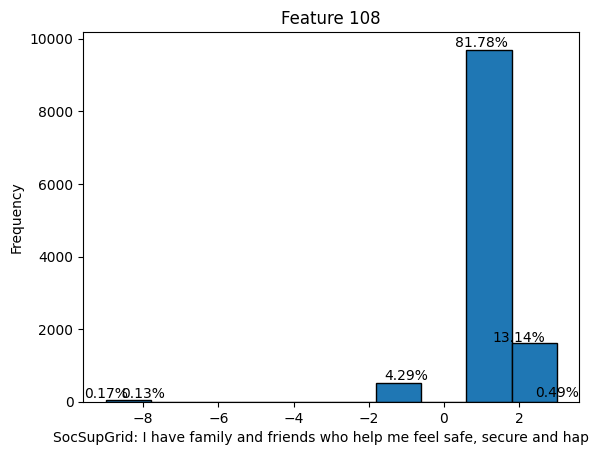

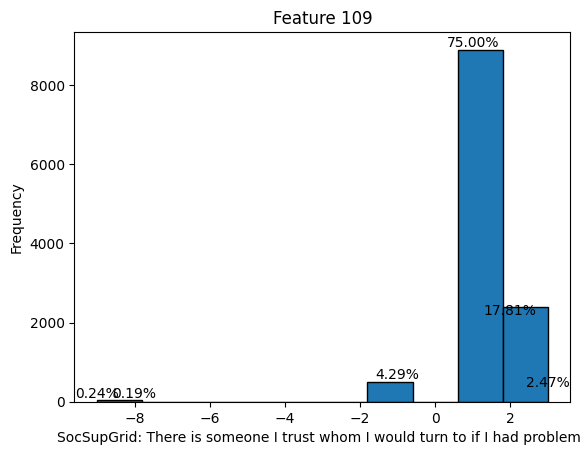

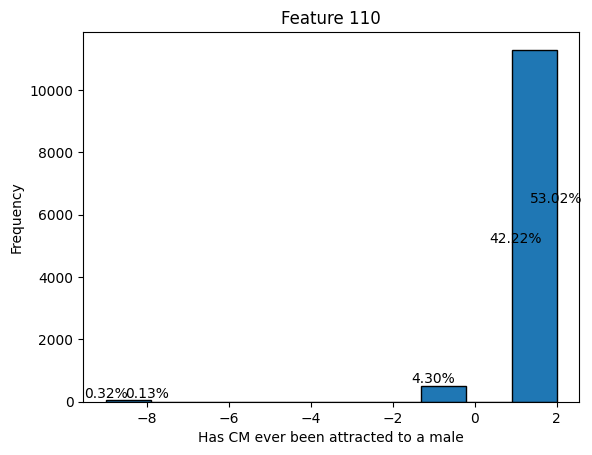

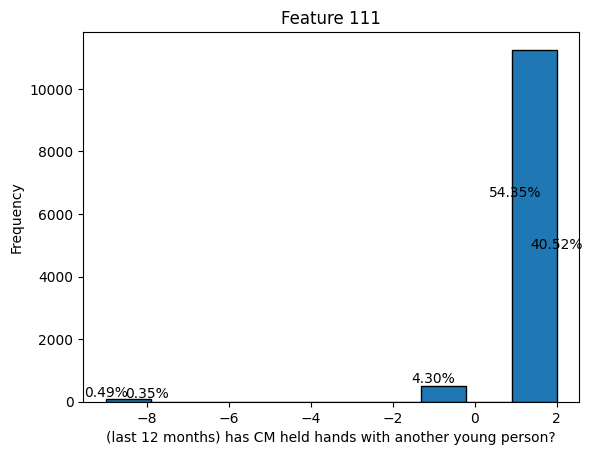

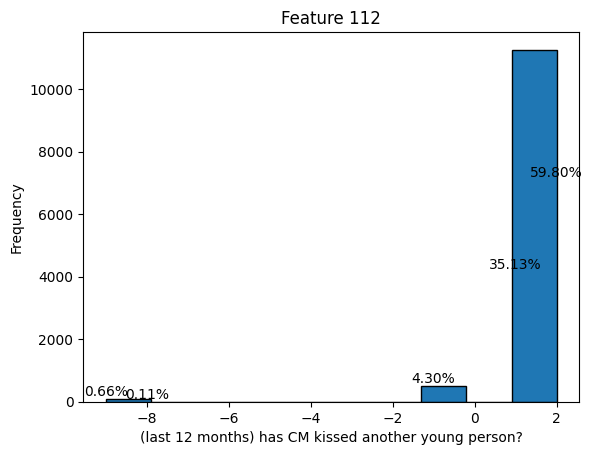

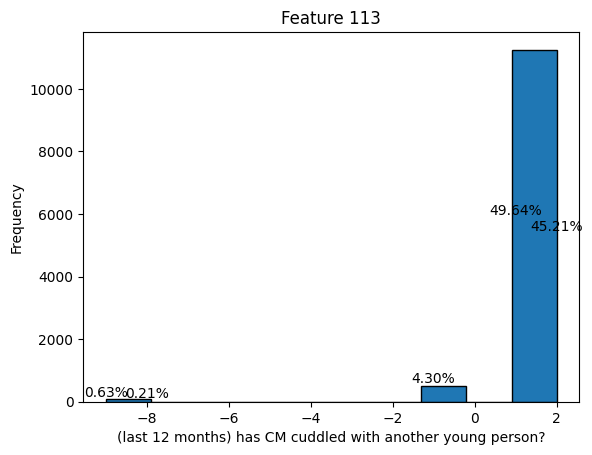

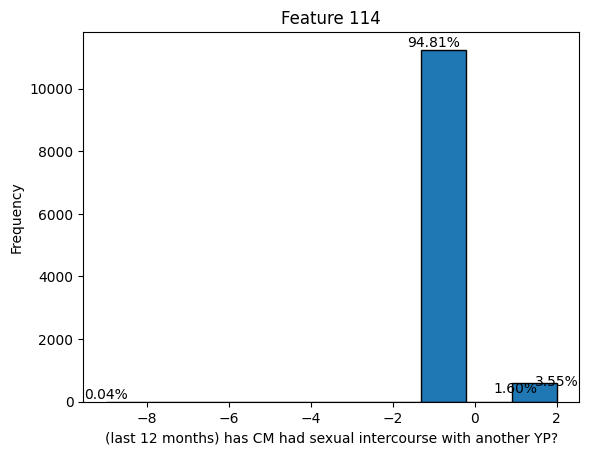

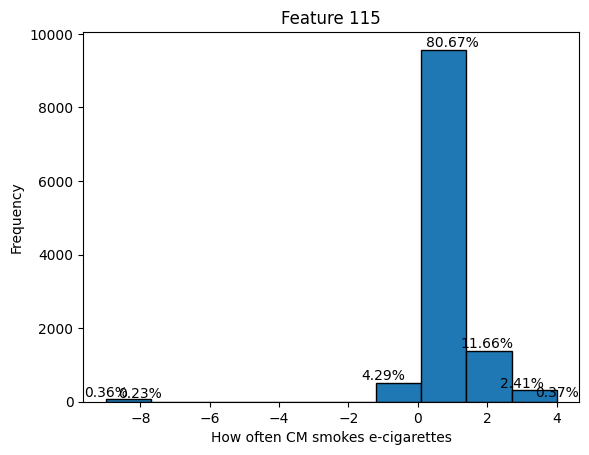

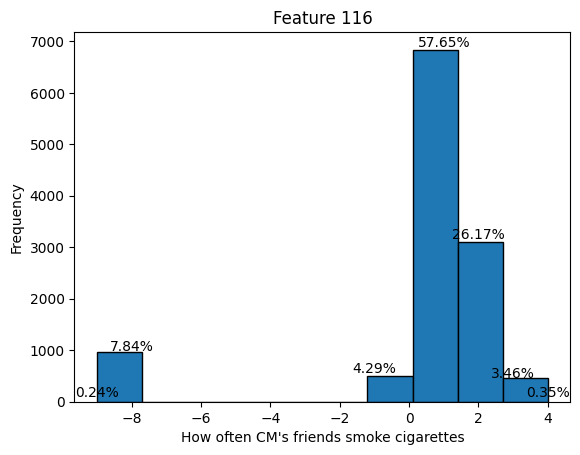

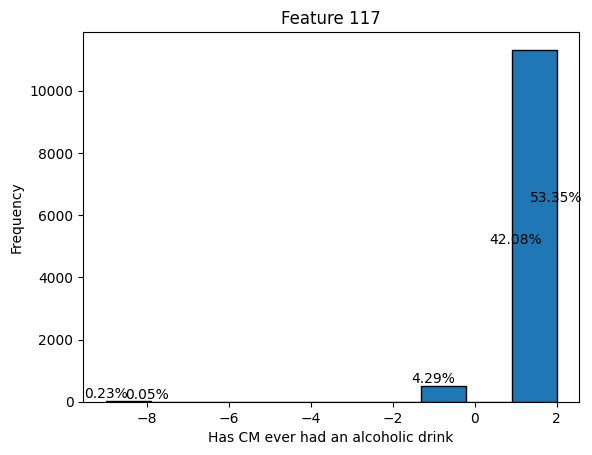

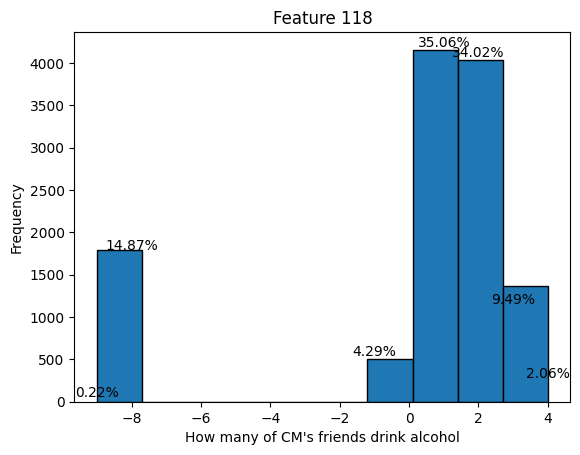

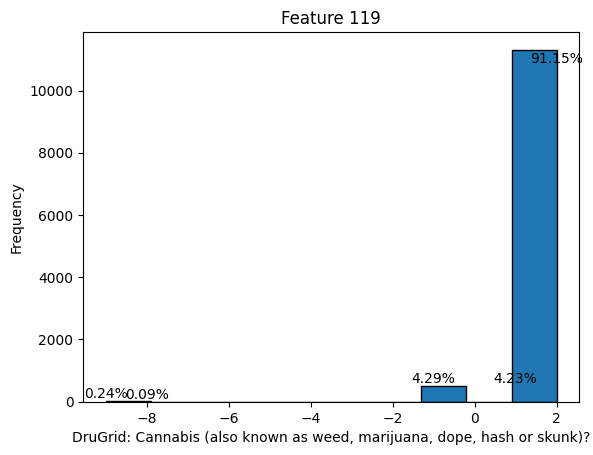

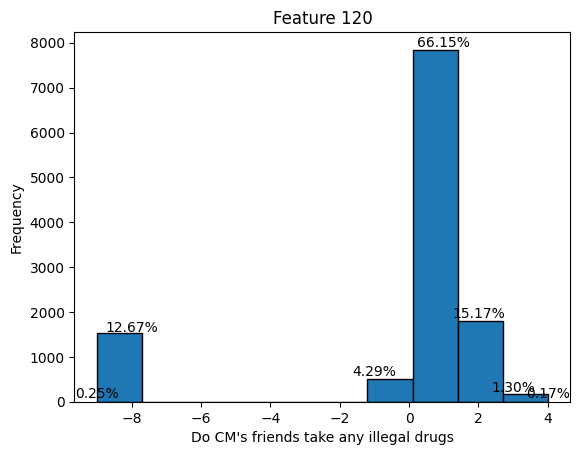

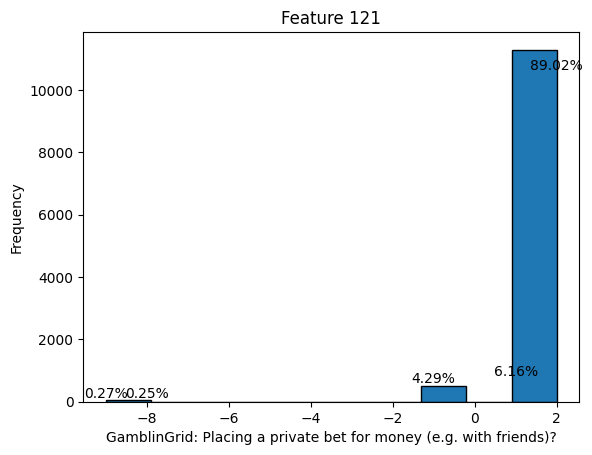

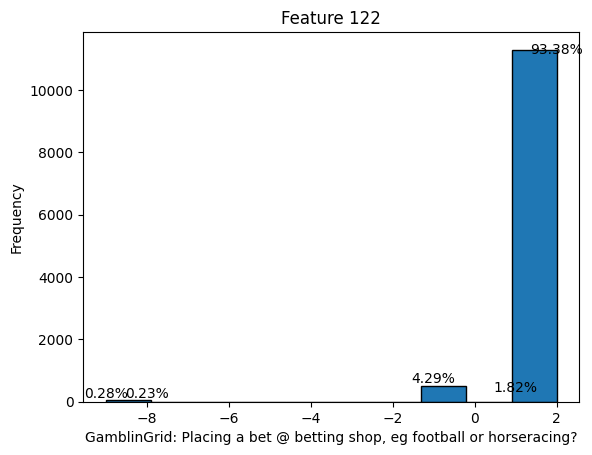

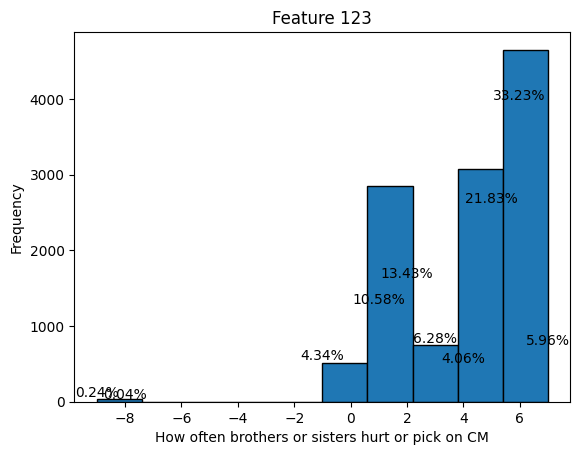

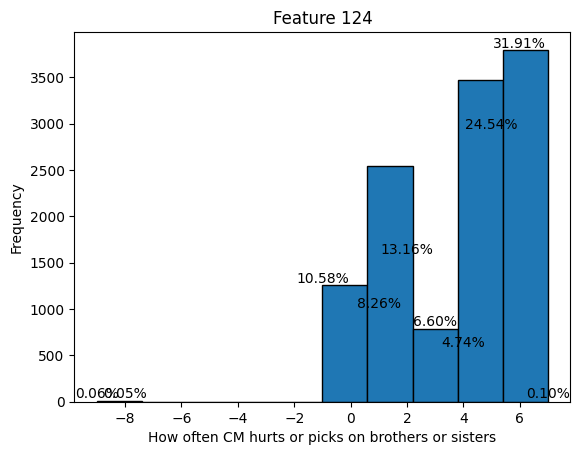

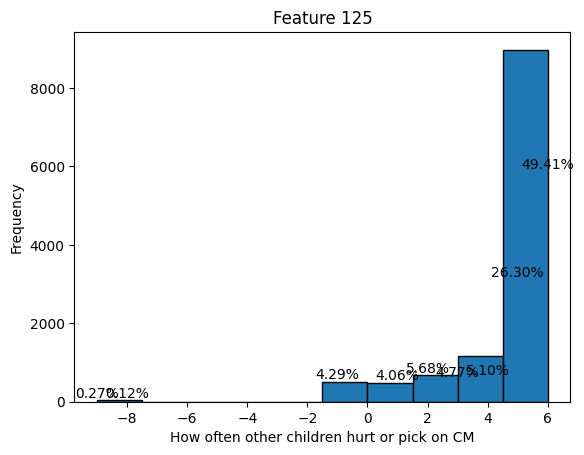

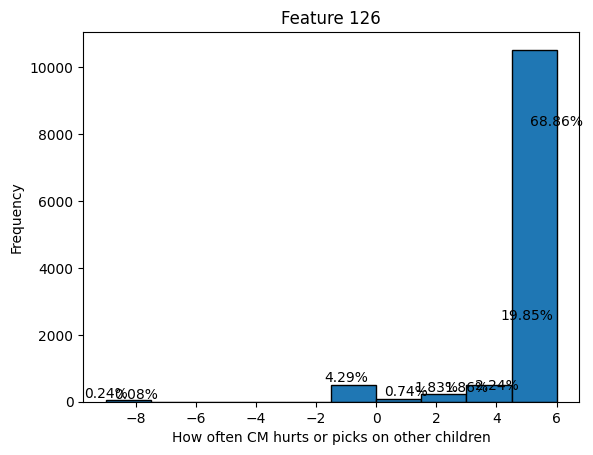

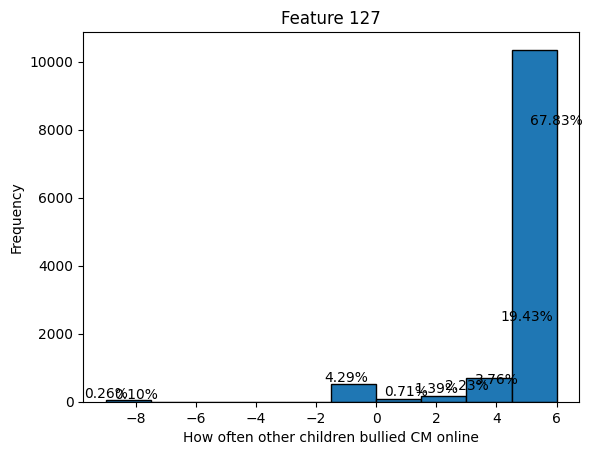

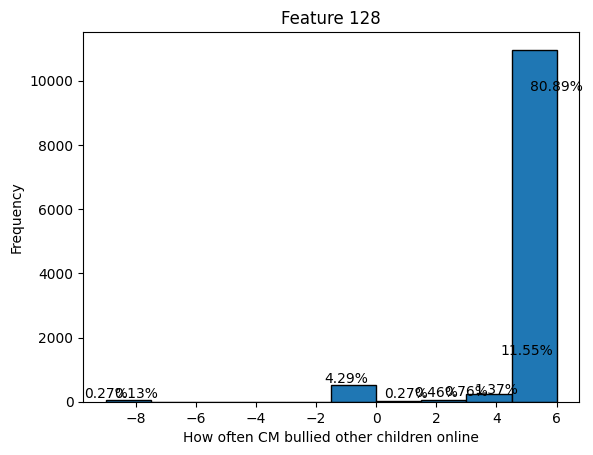

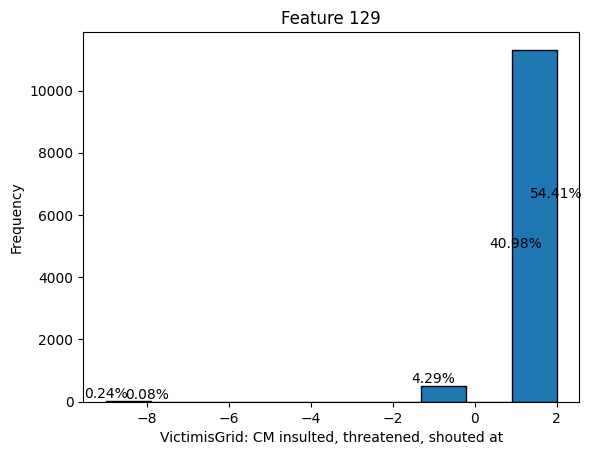

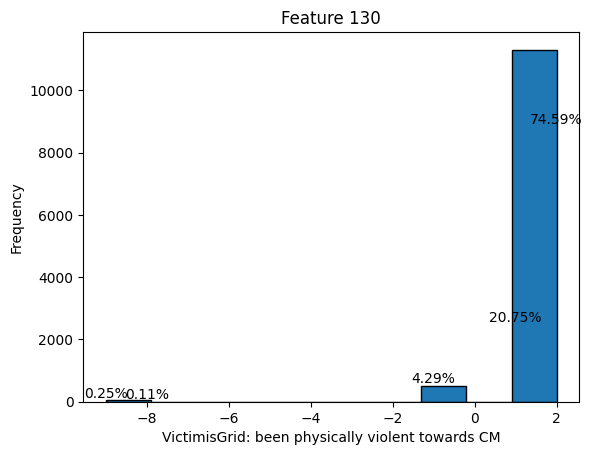

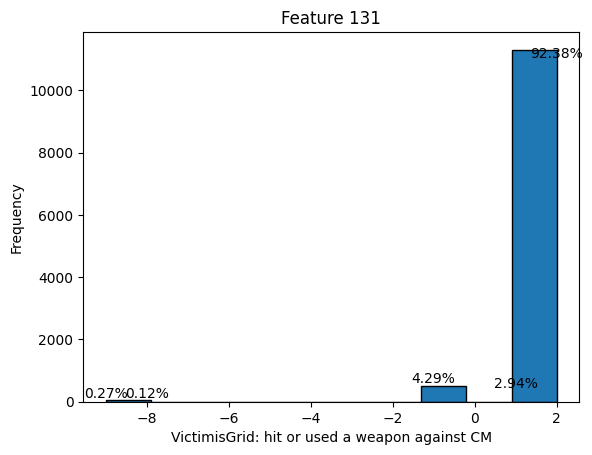

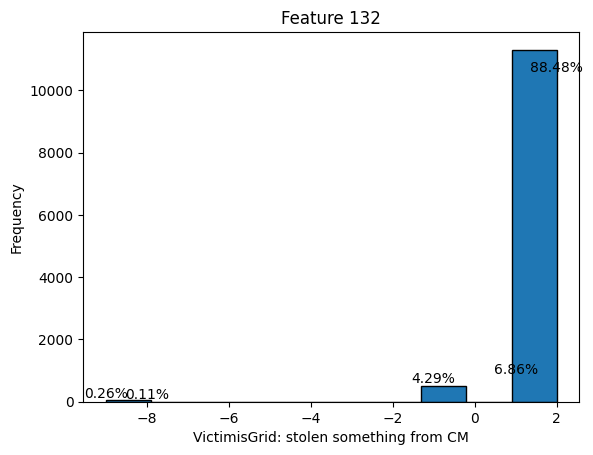

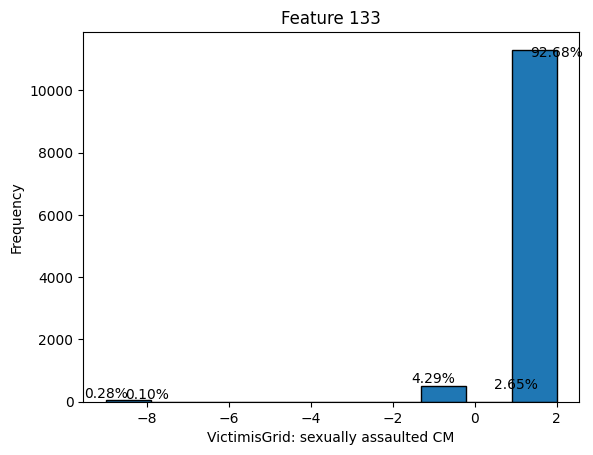

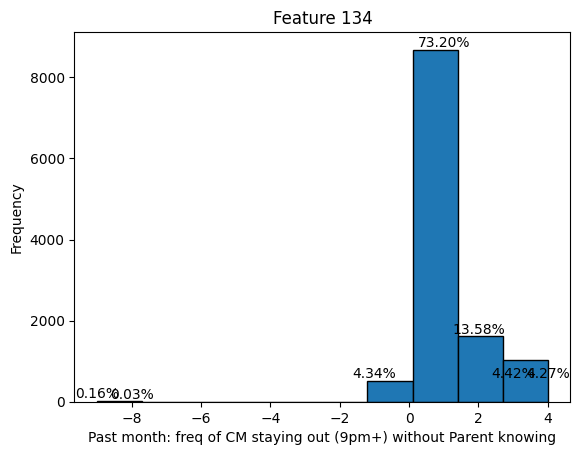

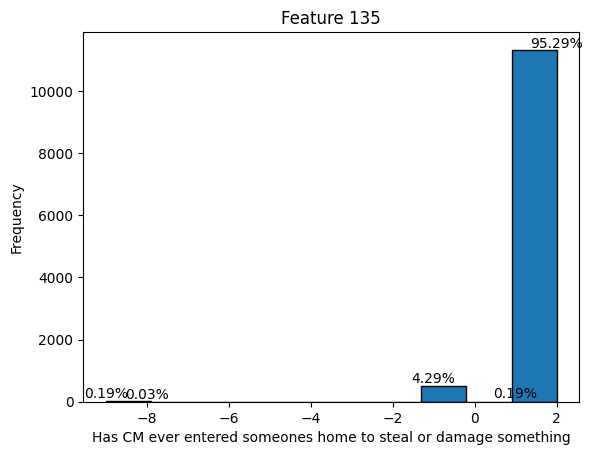

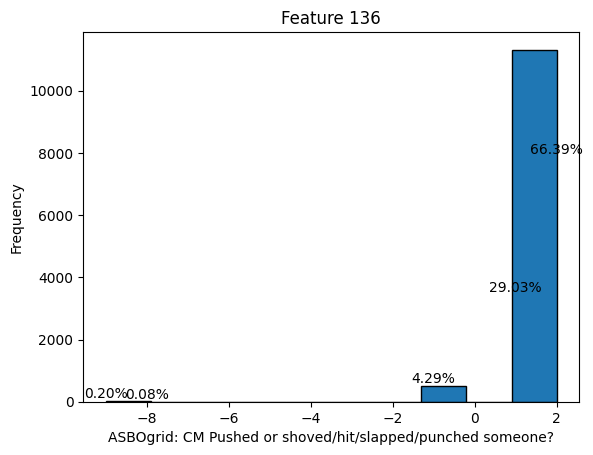

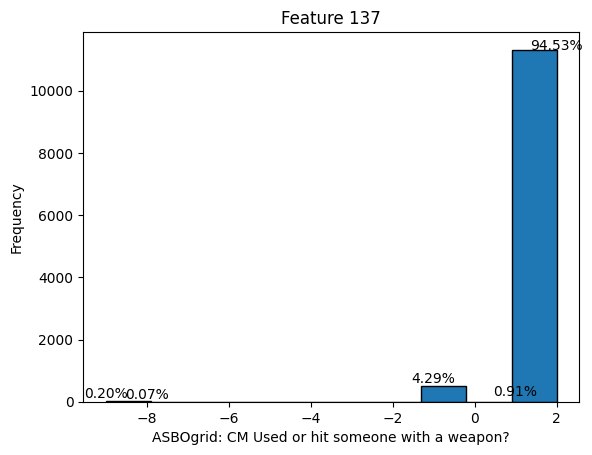

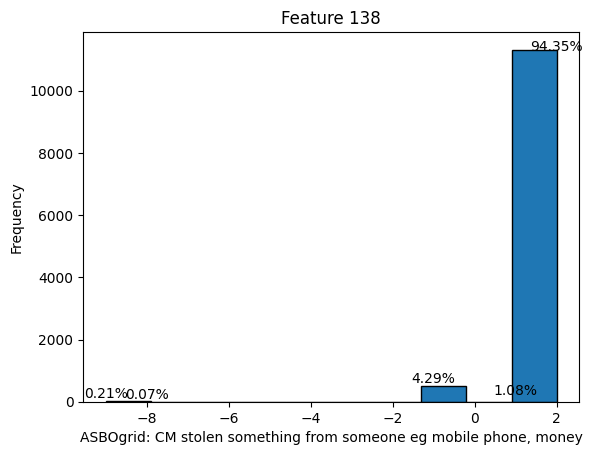

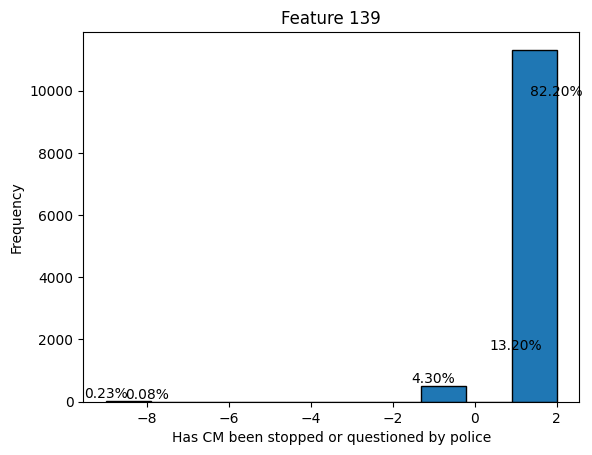

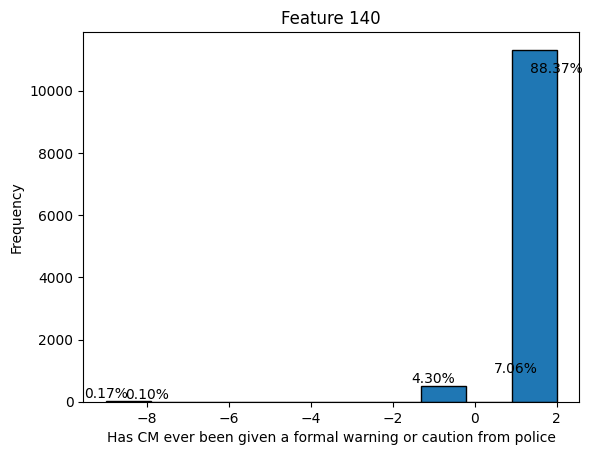

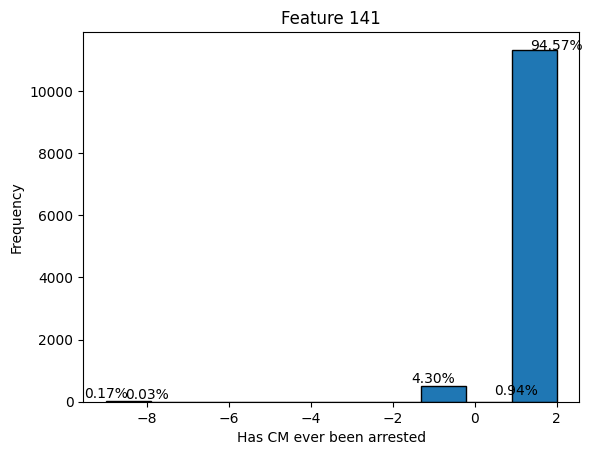

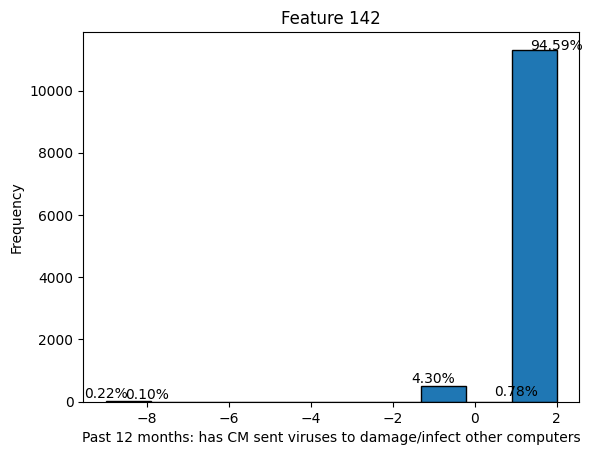

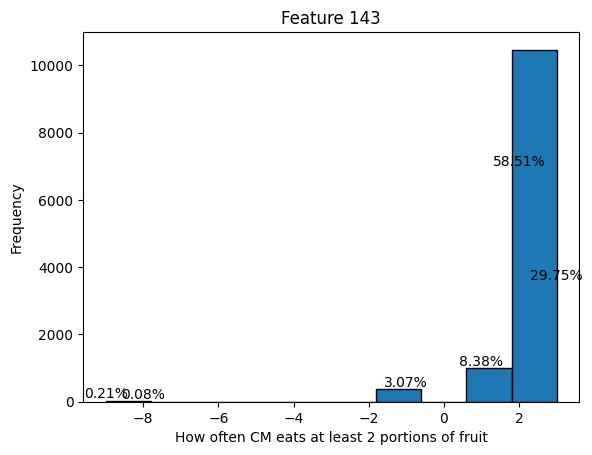

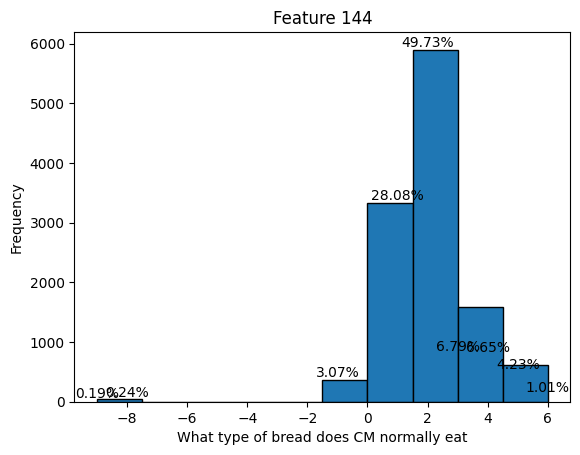

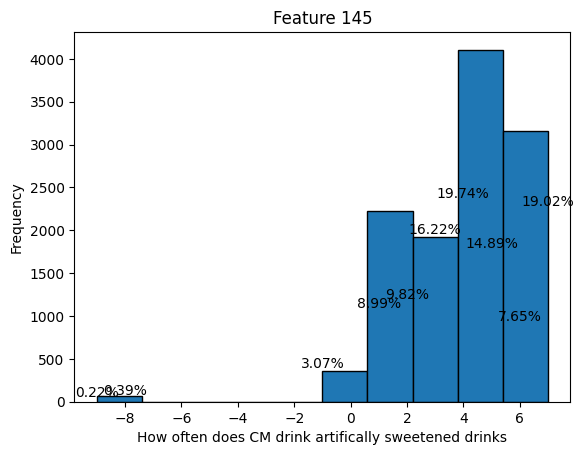

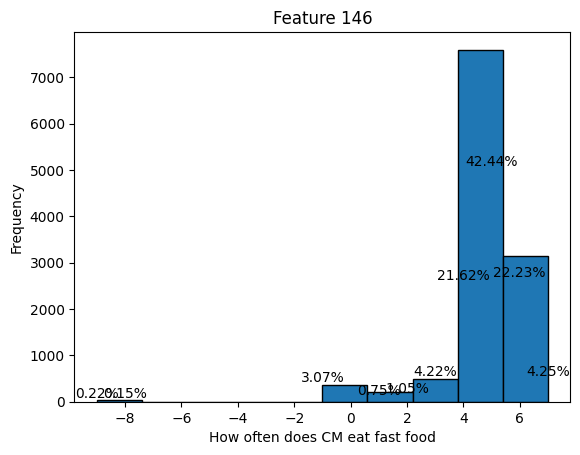

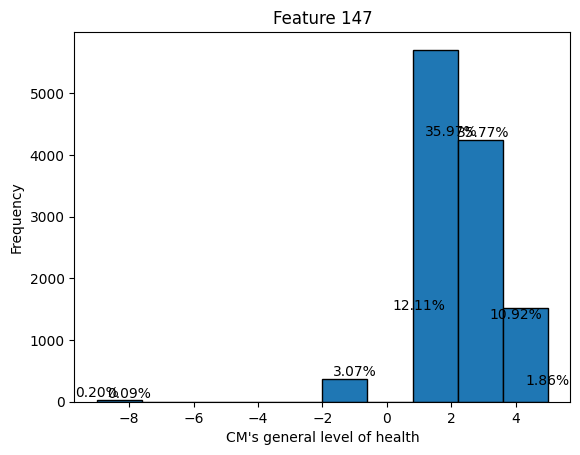

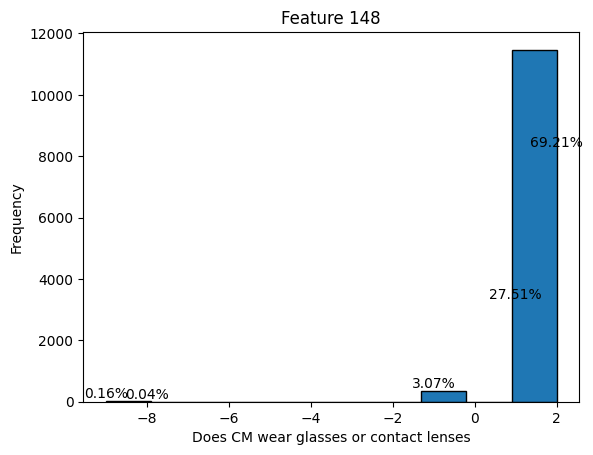

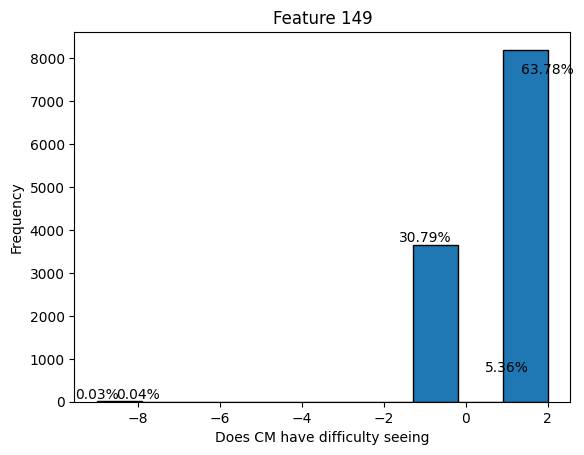

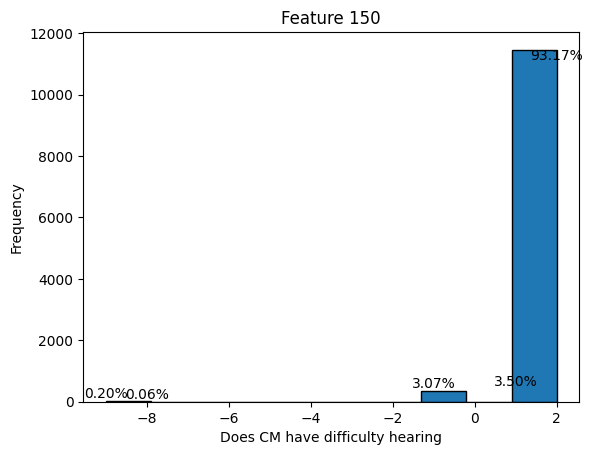

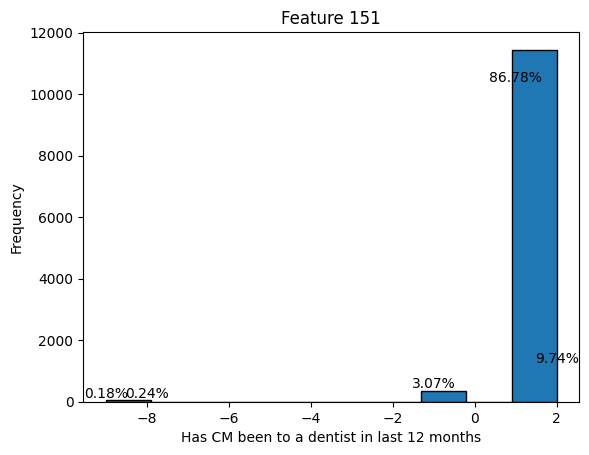

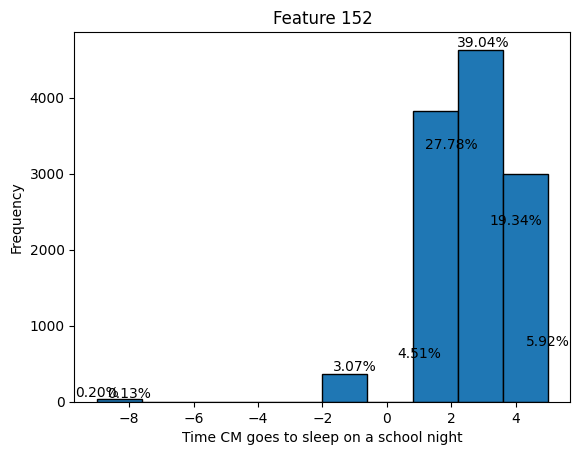

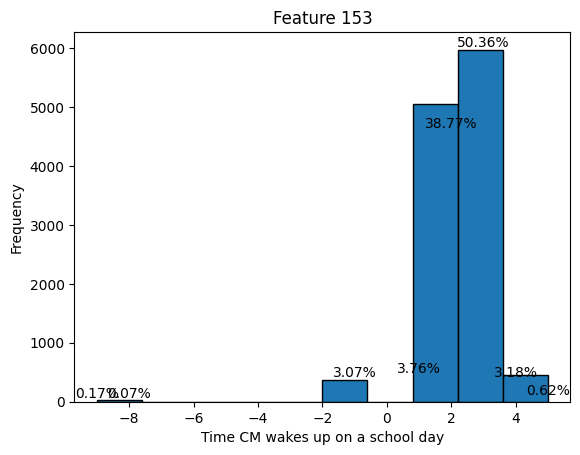

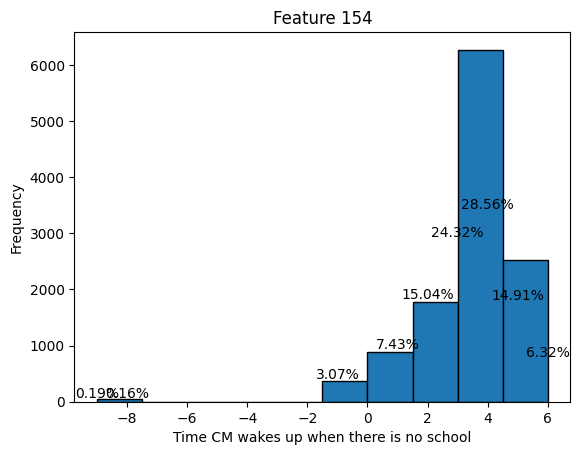

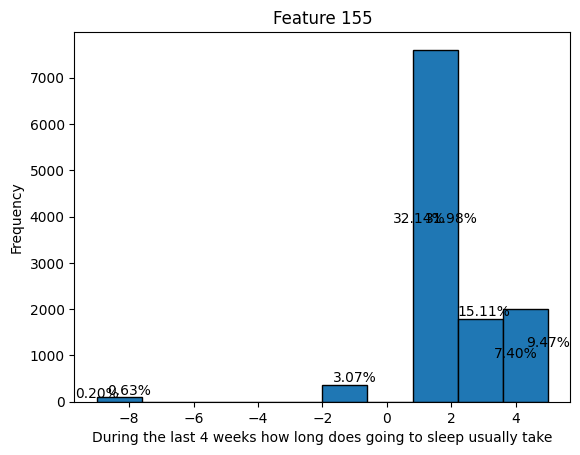

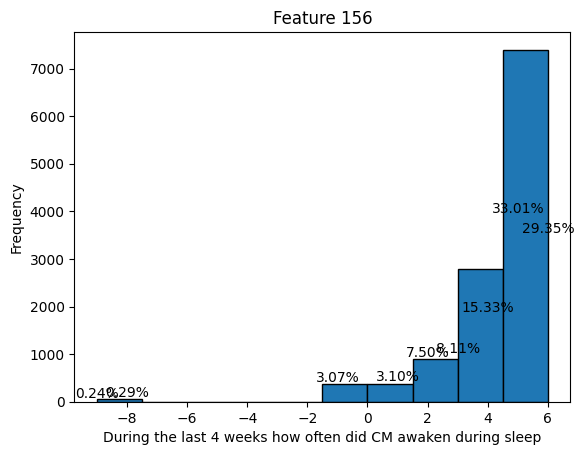

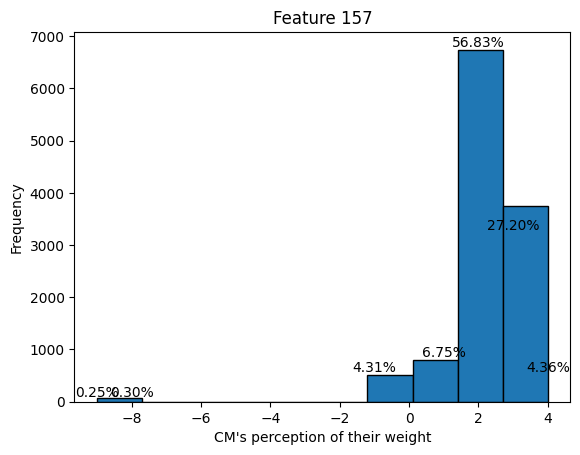

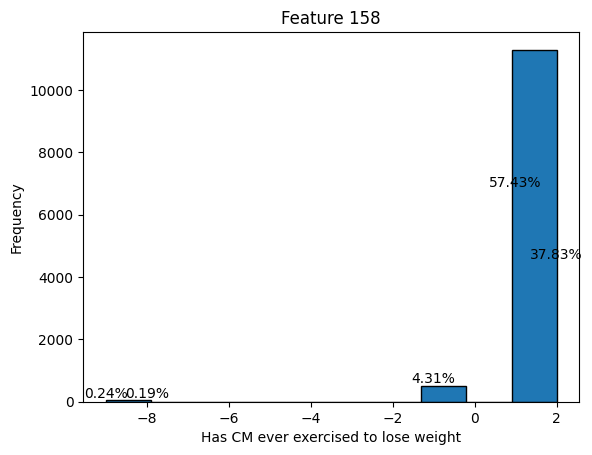

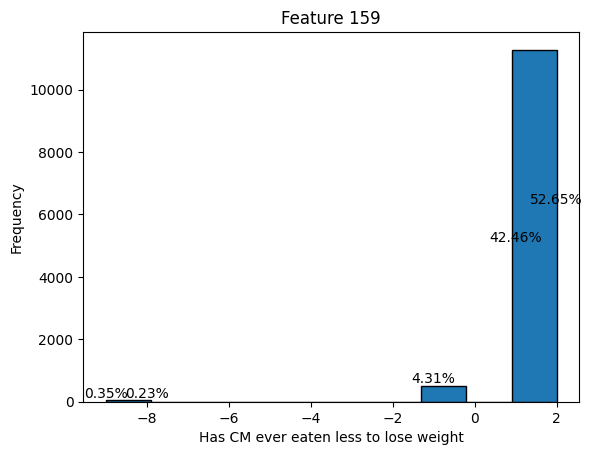

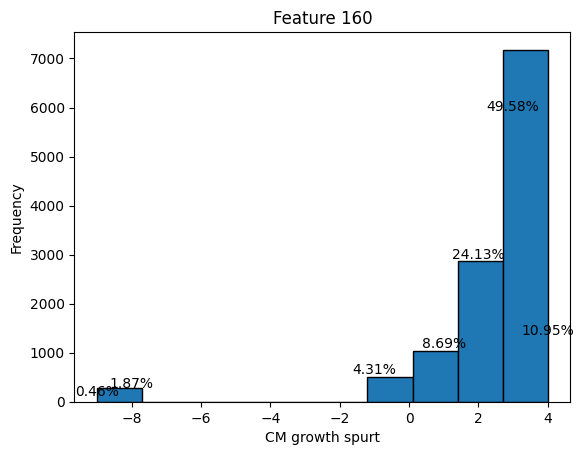

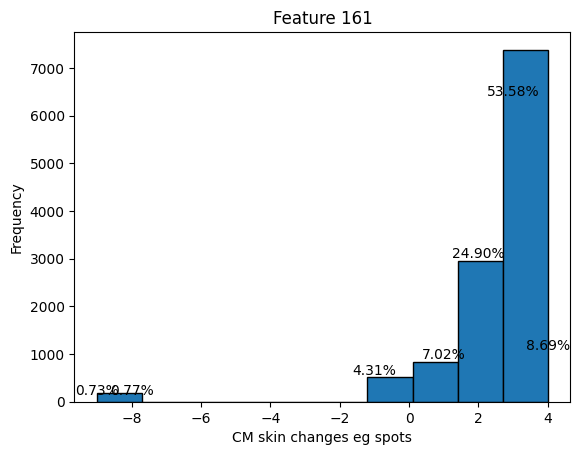

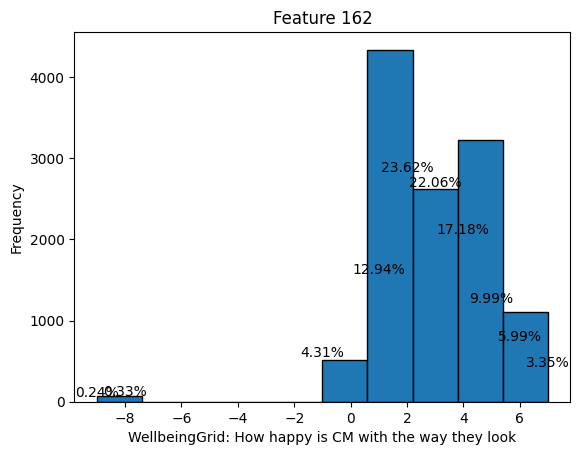

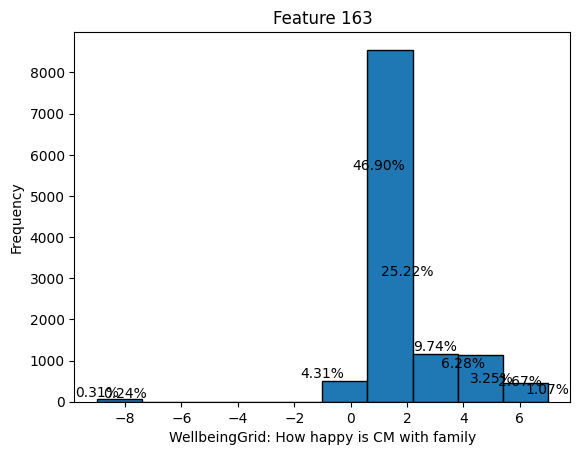

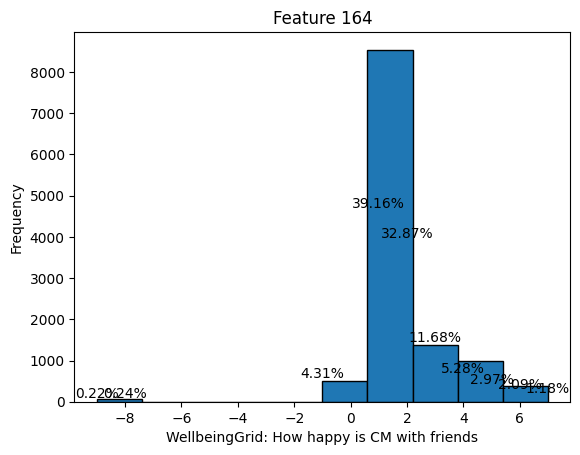

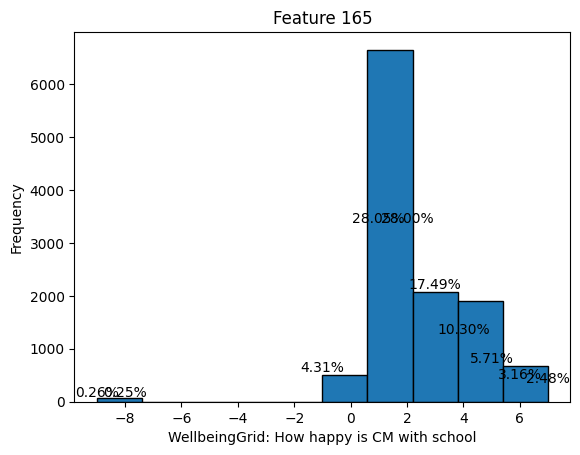

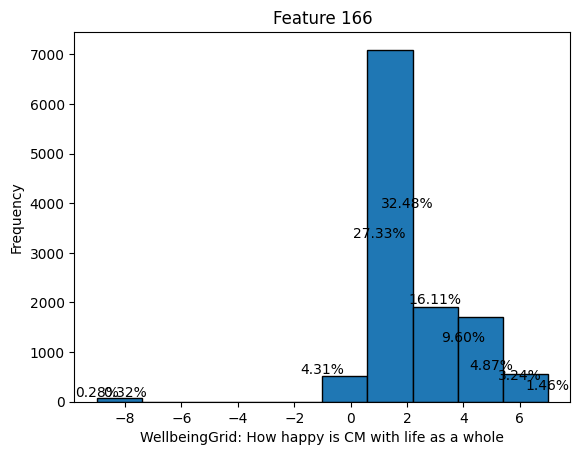

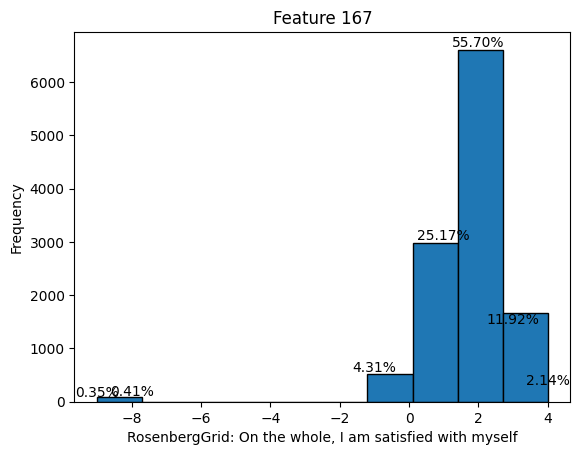

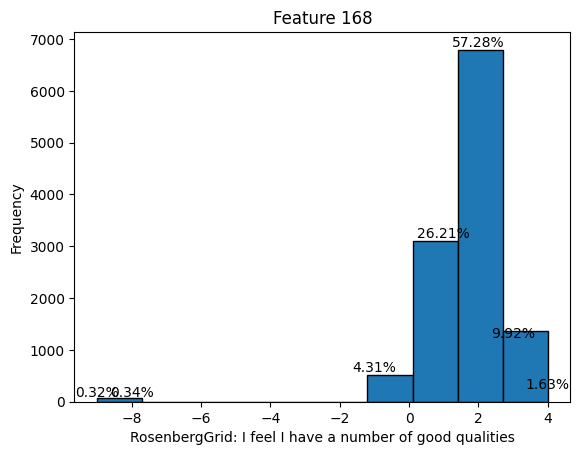

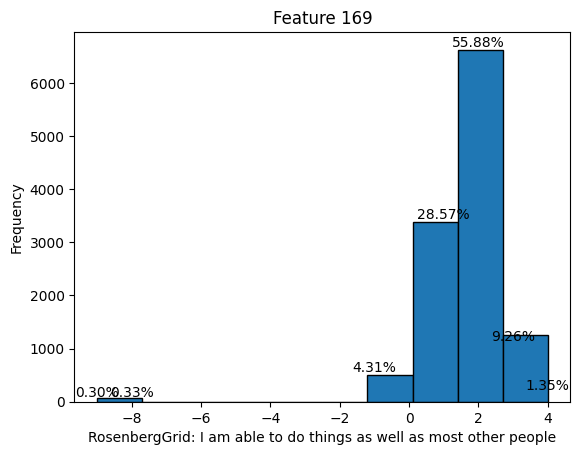

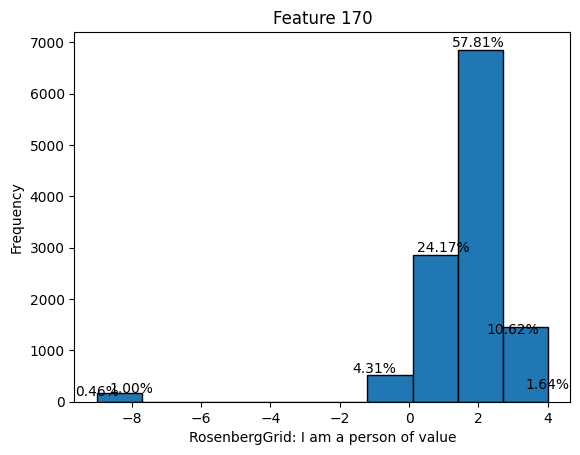

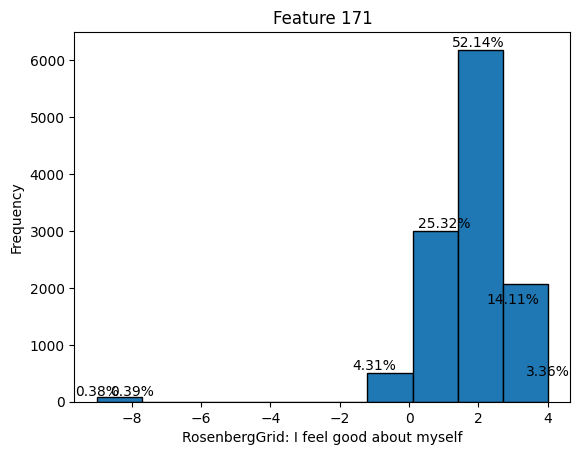

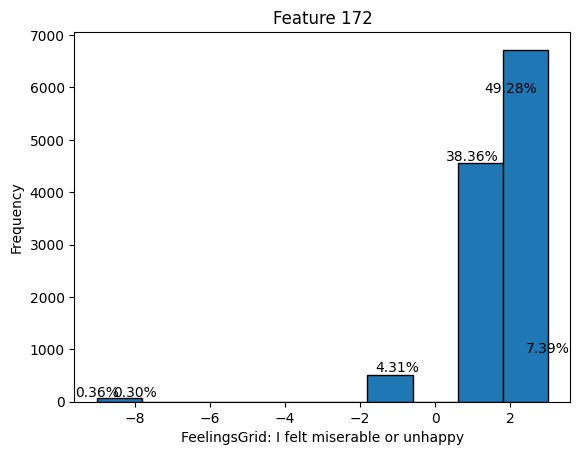

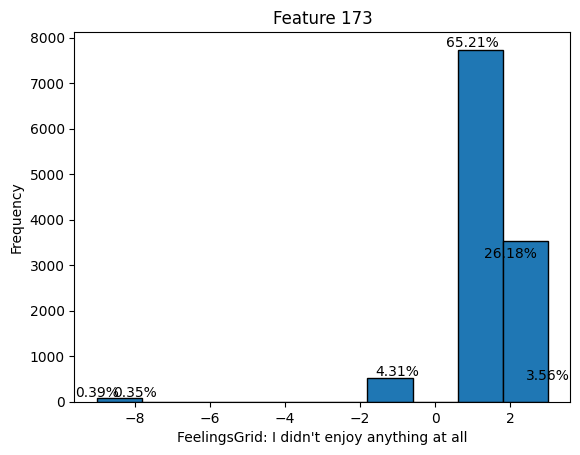

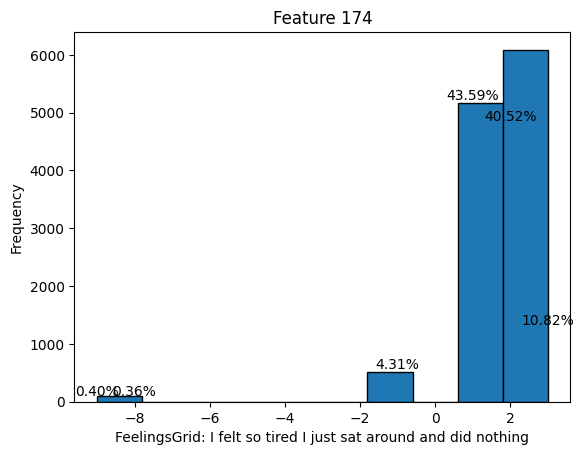

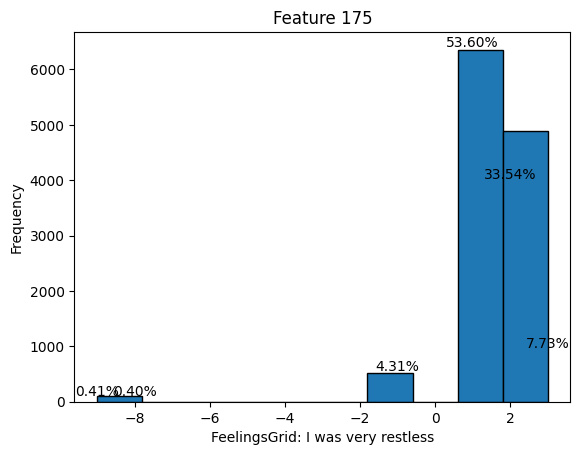

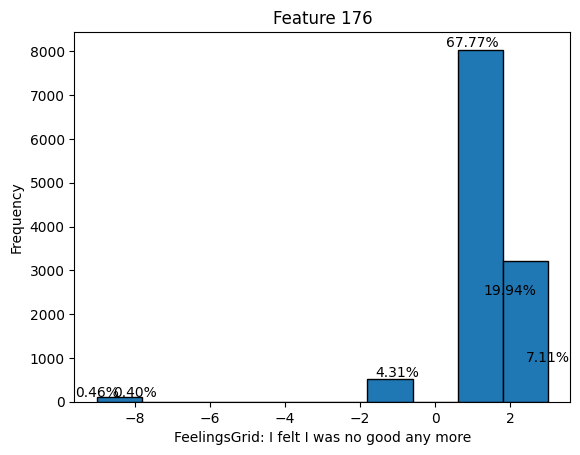

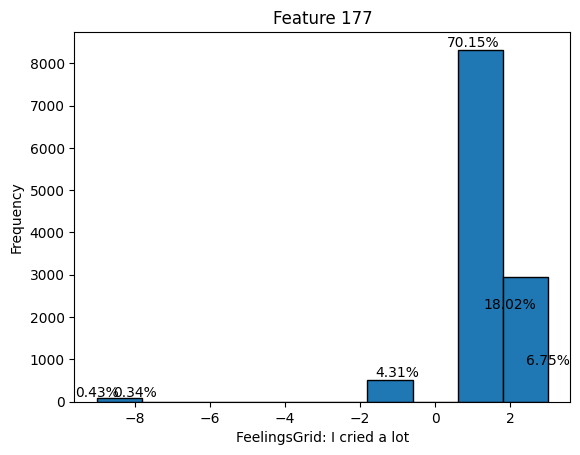

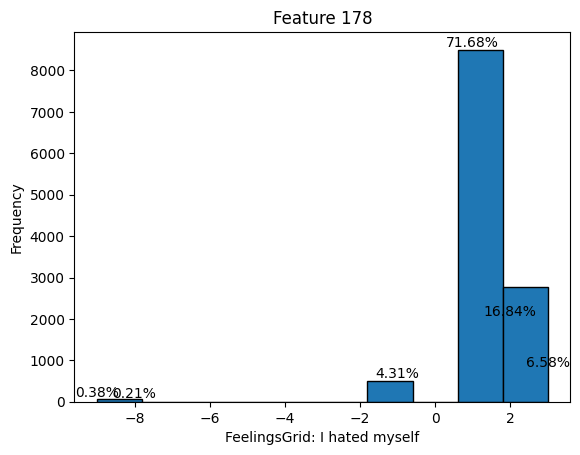

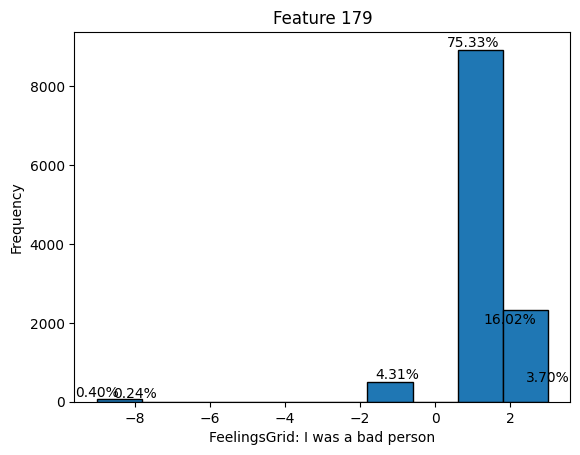

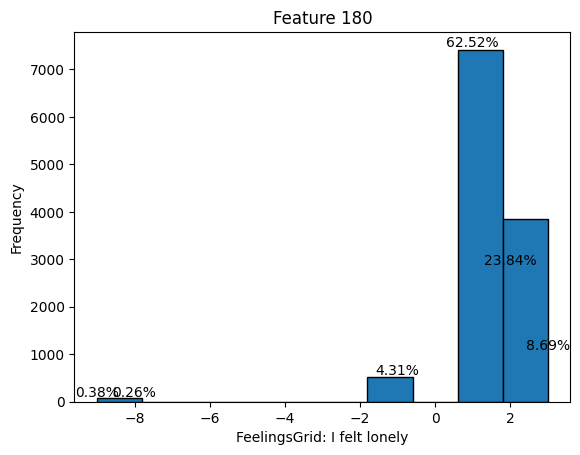

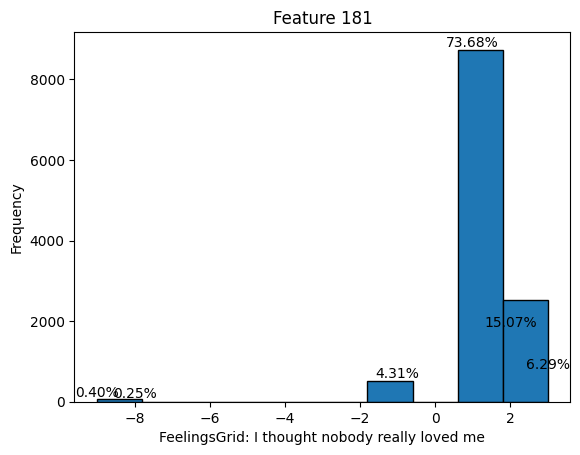

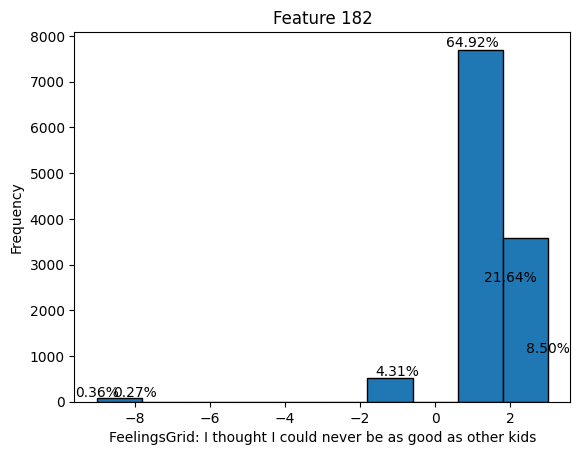

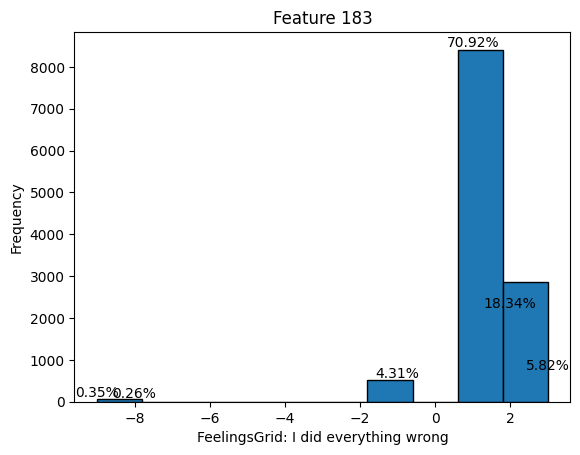

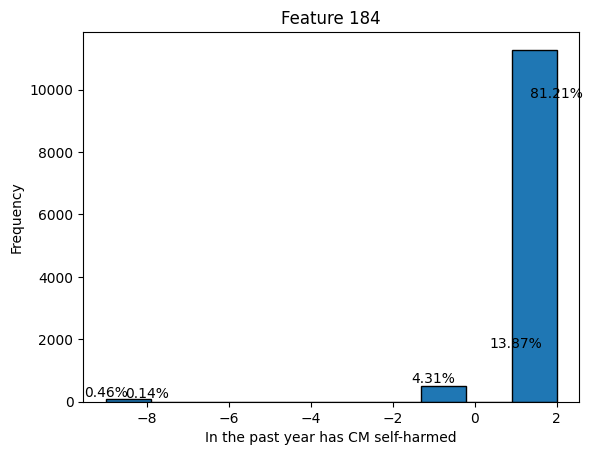

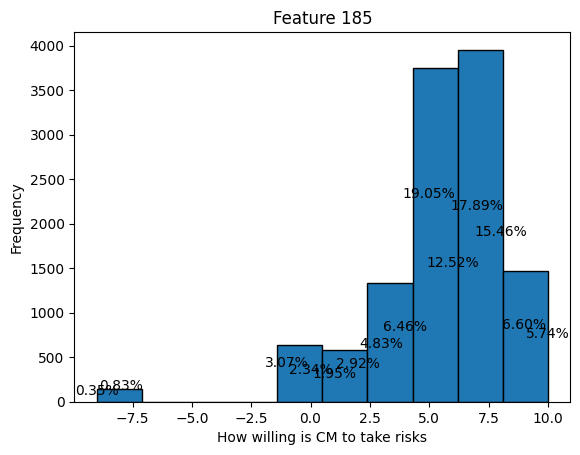

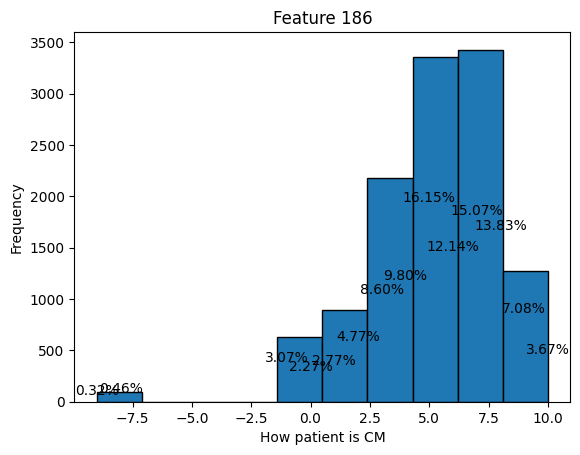

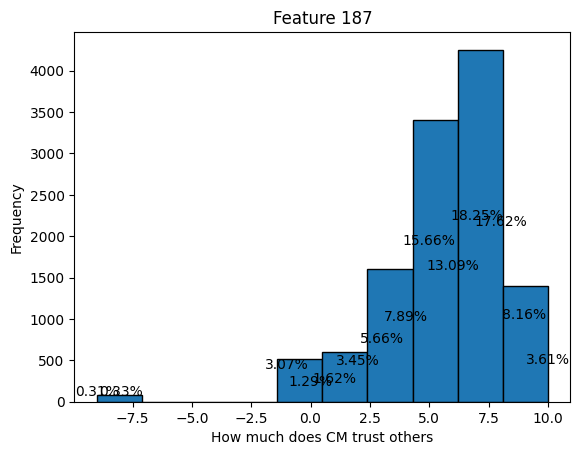

In [17]:
for i, column in enumerate(data_small.columns):
    feature = data_small[column]
    
    # Plot the histogram for numerical data
    plt.hist(feature.dropna(), edgecolor='black')  # Drop NaN values before plotting
    plt.xlabel(feature.name)
    plt.ylabel('Frequency')
    plt.title(f"Feature {i + 1}")

    # Calculate value counts and percentages
    value_counts = feature.value_counts()
    total_counts = len(feature.dropna())
    for value, count in value_counts.items():
        percentage = (count / total_counts) * 100
        plt.text(value, count, f'{percentage:.2f}%', ha='center', va='bottom')

    plt.show()

In [18]:
data_small[column_headings[7]].value_counts()/ len(data_small[column_headings[7]]) * 100

IWR: Weight measurement circumstances MC (A) [Unable to stand still]
 0    93.329960
-1     6.526689
 1     0.143351
Name: count, dtype: float64

In [19]:
data_small[column_headings[8]].value_counts()/ len(data_small[column_headings[8]]) * 100

ActivGrid: Go to the cinema?
 4    47.255249
 3    29.665233
 5    11.729488
 6     5.405178
-1     2.942913
 2     2.234590
 1     0.598701
-8     0.126486
-9     0.042162
Name: count, dtype: float64

In [20]:
data_small[column_headings[18]].value_counts()/ len(data_small[column_headings[18]]) * 100

Does CM have computer of their own
 1    81.330635
 2    15.718020
-1     2.942913
-8     0.008432
Name: count, dtype: float64

In [21]:
data_small[column_headings[49]].value_counts()/ len(data_small[column_headings[49]]) * 100

Who decided next year subjects (Parents)
 0    63.310566
-1    20.532929
 1    16.072181
-8     0.075892
-9     0.008432
Name: count, dtype: float64

In [22]:
data_small[column_headings[67]].value_counts()/ len(data_small[column_headings[67]]) * 100

Respondent s religion (A) [England]
-1     36.132895
 1     31.857661
 2     19.040391
 6      9.157602
 4      1.475672
 7      0.986592
 8      0.556539
 9      0.193946
 5      0.168648
 3      0.160216
 11     0.134919
 10     0.134919
Name: count, dtype: float64

In [23]:
data_small[column_headings[111]].value_counts()/ len(data_small[column_headings[111]]) * 100

(last 12 months) has CM kissed another young person?
 2    59.802682
 1    35.129438
-1     4.300531
-9     0.657728
-8     0.109621
Name: count, dtype: float64

In [24]:
data_small[column_headings[90:100]]

DisciplineGrid: Tell you off or shout at you?  \
0                                                  1   
1                                                  1   
2                                                  1   
3                                                  1   
4                                                  1   
...                                              ...   
11854                                              1   
11855                                              1   
11856                                              1   
11857                                              1   
11858                                              1   

       DisciplineGrid: Ground you, stop you going out or from seeing your friends?  \
0                                                      1                             
1                                                      1                             
2                                                      2                             
3                                                      1                             
4                                                      2                             
...                                                  ...                             
11854                                                  1                             
11855                                                  2                             
11856                                                  2                             
11857                                                  2                             
11858                                                  1                             

       DisciplineGrid: Punish you in some other way?  \
0                                                  2   
1                                                  1   
2                                                  2   
3                                                  2   
4                                                  2   
...                                              ...   
11854                                              2   
11855                                              2   
11856                                              2   
11857                                              1   
11858                                              1   

       Does your natural father live with you?  \
0                                            1   
1                                            1   
2                                            1   
3                                            1   
4                                            1   
...                                        ...   
11854                                        2   
11855                                       -1   
11856                                        1   
11857                                        2   
11858                                        1   

       How often do you see any of your grandparents?  \
0                                                   3   
1                                                   3   
2                                                   5   
3                                                   3   
4                                                   5   
...                                               ...   
11854                                               3   
11855                                               3   
11856                                               3   
11857                                               7   
11858                                               3   

       Do you have any close friends? (friends = other young people)  \
0                                                      1               
1                                                      1               
2                                                      1               
3                                                     

In [25]:
numerical = [
    'CM Age last birthday',
    'Height in centimeters',
    'Weight in kilos',
    'Body fat percentage',
    'Days last week spent doing moderate to vigorous physical activity',
    'Hours per WEEKDAY spent watching TV or videos on computer',
    'Hours per WEEKDAY spent playing electronic games',
    'Hours per week spent on social networking sites',
    'How likely is it CM will remain in education at the end of year 11?',
    'How likely is it CM will go to university? (Scale 0-100%)'
]

In [26]:
# Select the first 100 columns of the DataFrame 'data_small'
selected_columns = data_small[column_headings[:100]]

# Exclude columns listed in the 'numerical' list
cat_ordinal = selected_columns.loc[:, ~selected_columns.columns.isin(numerical)].columns.tolist()

In [27]:
selected_columns

CM Sex  CM DOB (month)  CM DOB (year)  CM Age last birthday  \
0           1               3           2001                    13   
1           1              10           2000                    14   
2           2               5           2001                    13   
3           1              11           2000                    14   
4           2               7           2001                    13   
...       ...             ...            ...                   ...   
11854       1              11           2000                    14   
11855       2              10           2001                    14   
11856       2              12           2000                    14   
11857       2              10           2000                    14   
11858       1               2           2001                    14   

       Height in centimeters  Weight in kilos  Body fat percentage  \
0                      163.2             52.3                 16.5   
1                      173.6             57.1                 14.4   
2                      163.9             56.2                 26.7   
3                      167.0             51.5                 18.8   
4                      163.8             56.9                 26.7   
...                      ...              ...                  ...   
11854                  182.3             71.3                 13.3   
11855                  157.6             53.3                 27.0   
11856                  162.7             48.5                 19.5   
11857                  170.4             61.2                 30.1   
11858                  151.7             45.9                 19.5   

       IWR: Weight measurement circumstances MC (A) [Unable to stand still]  \
0                                                      0                      
1                                                      0                      
2                                                      0                      
3                                                      0                      
4                                                      0                      
...                                                  ...                      
11854                                                  0                      
11855                                                  0                      
11856                                                  0                      
11857                                                  0                      
11858                                                  0                      

       ActivGrid: Go to the cinema?  ActivGrid: Go to watch live sport?  ...  \
0                                 4                                   4  ...   
1                                 5                                   3  ...   
2                                 4                                   3  ...   
3                                 4                                   4  ...   
4                                 3                                   4  ...   
...                             ...                                 ...  ...   
11854                             5                                   4  ...   
11855                             5                                   3  ...   
11856                             4                                   4  ...   
11857                             5                                   6  ...   
11858                             4                                   5  ...   

       DisciplineGrid: Tell you off or shout at you?  \
0                                                  1   
1                                                  1   
2                                                  1   
3                                                  1   
4                                                  1   
...                                              ...   
11854                  

In [28]:
cat_ordinal

['CM Sex',
 'CM DOB (month)',
 'CM DOB (year)',
 'IWR: Weight measurement circumstances MC (A) [Unable to stand still]',
 'ActivGrid: Go to the cinema?',
 'ActivGrid: Go to watch live sport?',
 'ActivGrid: Sing in a choir or play in a band or orchestra?',
 'ActivGrid: Read for enjoyment (not for school)?',
 'ActivGrid: Go to youth clubs/scouts/girlguides or oth organised activities?',
 'ActivGrid: Go to museums/galleries, visit historic place/stately home?',
 'ActivGrid: Attend a religious service?',
 'Does CM have computer of their own',
 'Does CM ever use the internet at home',
 'Has CM has any formal cycle training',
 'Area safety: safe for CM to walk/play etc within a mile/20 min from home',
 'Do you allow unsupervised time outside home with frds (on weekends)',
 'Do you allow unsupervised time outside home with frds (afternoon after school)',
 'Where CM gets spending money from MC (A) [Regular pocket money/allowance]',
 'Where CM gets spending money from MC (A) [Chores/babysitting

In [29]:
cat_ordinal = cat_ordinal[:1] + cat_ordinal[4:]
cat_ordinal

['CM Sex',
 'ActivGrid: Go to the cinema?',
 'ActivGrid: Go to watch live sport?',
 'ActivGrid: Sing in a choir or play in a band or orchestra?',
 'ActivGrid: Read for enjoyment (not for school)?',
 'ActivGrid: Go to youth clubs/scouts/girlguides or oth organised activities?',
 'ActivGrid: Go to museums/galleries, visit historic place/stately home?',
 'ActivGrid: Attend a religious service?',
 'Does CM have computer of their own',
 'Does CM ever use the internet at home',
 'Has CM has any formal cycle training',
 'Area safety: safe for CM to walk/play etc within a mile/20 min from home',
 'Do you allow unsupervised time outside home with frds (on weekends)',
 'Do you allow unsupervised time outside home with frds (afternoon after school)',
 'Where CM gets spending money from MC (A) [Regular pocket money/allowance]',
 'Where CM gets spending money from MC (A) [Chores/babysitting]',
 'Where CM gets spending money from MC (A) [Working in the family business]',
 'Where CM gets spending mon

In [30]:
print(len(cat_ordinal))
print(len(numerical))

87
10


In [31]:
data_small['CM Sex']

0        1
1        1
2        2
3        1
4        2
        ..
11854    1
11855    2
11856    2
11857    2
11858    1
Name: CM Sex, Length: 11859, dtype: int64

In [32]:
numerical = [
    'CM Age last birthday',
    'Height in centimeters',
    'Weight in kilos',
    'Body fat percentage',
    'Days last week spent doing moderate to vigorous physical activity',
    'Hours per WEEKDAY spent watching TV or videos on computer',
    'Hours per WEEKDAY spent playing electronic games',
    'Hours per week spent on social networking sites',
    'How likely is it CM will remain in education at the end of year 11?',
    'How likely is it CM will go to university? (Scale 0-100%)'
]

In [33]:
cat_nominal = [
    'CM Sex', # 1 Male; 2 Female
    'Respondent s religion (A) [England]', #(-1.0) Not applicable  (1.0) No religion     (2.0) Christian (including Church of England, (3.0) Buddhist        (4.0) Hindu   (5.0) Jewish  (6.0) Muslim  (7.0) Sikh    (8.0) Any other religion (PLEASE WRITE IN)    (9.0) Don`t know      (10.0) Refused (11.0) Vague irrelevant answer 
    'Left/Right handed?', #(-9.0) Don't want to answer    (-8.0) Don't know      (-1.0) Not applicable  (1.0) Right hand      (2.0) Left hand       (3.0) Either hand         
]

In [34]:
cat_ordinal_lowest_num_is_highest_value = [
     'ActivGrid: Go to the cinema?',
     'ActivGrid: Go to watch live sport?',
     'ActivGrid: Sing in a choir or play in a band or orchestra?',
     'ActivGrid: Read for enjoyment (not for school)?',
     'ActivGrid: Go to youth clubs/scouts/girlguides or oth organised activities?',
     'ActivGrid: Go to museums/galleries, visit historic place/stately home?',
     'ActivGrid: Attend a religious service?',
     'Do you allow unsupervised time outside home with frds (on weekends)',
     'Do you allow unsupervised time outside home with frds (afternoon after school)',
     'MoralAttGrid: How important is it to you to be well liked?',
     'MoralAttGrid: How important is it to you to work hard?',
     'Wrong to start a fight',
     'Wrong to write or spray paint on building/fence etc',
     'Wrong to take things without paying',
     'Wrong to download music/films/games without paying',
     "How often does anyone at home help with CM's homework",
     'EducMotGrid: How often do you try your best at school?',
     'EducMotGrid: How often do you find school interesting?',
     'EducMotGrid: How often do you feel unhappy at school?',
     'EducMotGrid: How often do you get tired at school?',
     'EducMotGrid: How often do you feel school is a waste of time?',
     'EducMotGrid: How often difficult to keep mind on work at school? [NCDS, BCS]',
     'How often does CM misbehave in lessons',
     'How often does CM argue with mother',
     'How often does CM argue with father',
     'When CM goes out, how often do parents know where?',
     'When CM goes out, how often do parents know who with?',
     'When CM goes out, how often do parents know what CM does?',
     'How often do you see any of your grandparents?',
     'How many of your close friends go to the same school as you?',
     'How many of your close friends are boys?',
     'How many of your close friends are girls?',
     'How many of your close friends are from the same ethnic group as you?'
]

In [35]:
cat_ordinal_highest_num_is_highest_value = [
     'Does CM ever use the internet at home',
     'typical week term-time, how long cm spends doing homework?',
     'How close is CM with mother',
     'How close is CM with father',
]

In [36]:
# 1 Yes; 2 No
cat_nominal_binary_1_2 = [
    'Does CM have computer of their own',
    'Has CM has any formal cycle training',
    'Quiet area where CM is able to do homework',
    "Has CM missed school without parents' permission",
    'DisciplineGrid: Tell you off or shout at you?',
    'DisciplineGrid: Ground you, stop you going out or from seeing your friends?',
    'DisciplineGrid: Punish you in some other way?',
    'Does your natural father live with you?',
    'Do you have any close friends? (friends = other young people)',
]   

In [37]:
# 1 Yes; 0 No
cat_nominal_binary_1_0 = [
    'Where CM gets spending money from MC (A) [Regular pocket money/allowance]',
    'Where CM gets spending money from MC (A) [Chores/babysitting]',
    'Where CM gets spending money from MC (A) [Working in the family business]',
    'Where CM gets spending money from MC (A) [Paid job]',
    'Where CM gets spending money from MC (A) [Parents given when CM needs]',
    'Where CM gets spending money from MC (A) [Never get any money to spend]',
    'Where CM gets spending money from MC (A) [Money from friends/relatives]',
    'Where CM gets spending money from MC (A) [Money frm spcl occasins BirthD/Xmas]',
    'Where CM gets spending money from MC (A) [Reward for good behaviour/grades]',
    'Where CM gets spending money from MC (A) [Money for school]',
    'Where CM gets spending money from MC (A) [From selling items]',
    'Where CM gets spending money from MC (A) [Saving]',
    'Where CM gets spending money from MC (A) [Other earnings]',
    'Who decided next year subjects (Parents)',
    'Who decided next year subjects (School/teachers)',
    'Who decided next year subjects (You, yourself)',
    'Who decided next year subjects (Someone else)',
    'Area safety: safe for CM to walk/play etc within a mile/20 min from home',
    'Languages used speaking with friends MC (A) [English]',
    'Languages used speaking with friends MC (A) [Gaelic]',
    'Languages used speaking with friends MC (A) [Urdu]',
    'Languages used speaking with friends MC (A) [Punjabi]',
    'Languages used speaking with friends MC (A) [Hindi]',
    'Languages used speaking with friends MC (A) [Bengali]',
    'Languages used speaking with friends MC (A) [Sylheti]',
    'Languages used speaking with friends MC (A) [Tamil]',
    'Languages used speaking with friends MC (A) [Turkish]',
    'Languages used speaking with friends MC (A) [Arabic]',
    'Languages used speaking with friends MC (A) [Other]',
    'Languages used speaking with friends MC (A) [Other European language]',
    'Languages used speaking with friends MC (A) [Other African language]',
    'Languages used speaking with friends MC (A) [Other Asian language]'
]

In [38]:
# (1.0) Strongly agree  (2.0) Agree   (3.0) Disagree        (4.0) Strongly disagree  (5.0) Don't know/don't wish to answer
cat_ordinal_agree_1_disagree_4 = [
     "ConsumAttGrid: It bothers me if my friends have things I don't",
     'Needs qualifications to get a job worth having',
]

In [39]:
# (1.0) Strongly disagree       (2.0) Disagree        (3.0) Agree   (4.0) Strongly agree
cat_ordinal_agree_4_disagree_1 = [
    'AcademicSelfConceptGrid: I am good at English',
    'AcademicSelfConceptGrid: I am good at Maths',
    'AcademicSelfConceptGrid: I am good at Science',
    'AcademicSelfConceptGrid: I am good at PE'
]

In [40]:
print(f'numerical: {len(numerical)}')
print(f'cat_nominal: {len(cat_nominal)}')
print(f'cat_ordinal_lowest_num_is_highest_value: {len(cat_ordinal_lowest_num_is_highest_value)}')
print(f'cat_ordinal_highest_num_is_highest_value: {len(cat_ordinal_highest_num_is_highest_value)}')
print(f'cat_nominal_binary_1_2: {len(cat_nominal_binary_1_2)}')
print(f'cat_nominal_binary_1_0: {len(cat_nominal_binary_1_0)}')
print(f'cat_ordinal_agree_1_disagree_4: {len(cat_ordinal_agree_1_disagree_4)}')
print(f'cat_ordinal_agree_4_disagree_1: {len(cat_ordinal_agree_4_disagree_1)}')
total_length = len(numerical) + len(cat_nominal) + len(cat_ordinal_lowest_num_is_highest_value) + len(cat_ordinal_highest_num_is_highest_value) + len(cat_nominal_binary_1_2) + len(cat_nominal_binary_1_0) + len(cat_ordinal_agree_1_disagree_4) + len(cat_ordinal_agree_4_disagree_1)
print(f'total: {total_length}')

numerical: 10
cat_nominal: 3
cat_ordinal_lowest_num_is_highest_value: 33
cat_ordinal_highest_num_is_highest_value: 4
cat_nominal_binary_1_2: 9
cat_nominal_binary_1_0: 32
cat_ordinal_agree_1_disagree_4: 2
cat_ordinal_agree_4_disagree_1: 4
total: 97


In [41]:
# Assuming df is your DataFrame and lists contain the lists of column names
column_names_df = set(selected_columns.columns)
column_names_lists = set(numerical + cat_nominal + cat_ordinal_lowest_num_is_highest_value + cat_ordinal_highest_num_is_highest_value + 
                         cat_nominal_binary_1_2 + cat_nominal_binary_1_0 + cat_ordinal_agree_1_disagree_4 + cat_ordinal_agree_4_disagree_1
                        )  # Combine all lists into one set
missing_column_names = column_names_df - column_names_lists

print("Column names missing from lists:")
print(missing_column_names)

Column names missing from lists:
{'CM DOB (year)', 'CM DOB (month)', 'IWR: Weight measurement circumstances MC (A) [Unable to stand still]'}


##### Feature 100 to 187

In [42]:
cat_ordinal_lowest_num_is_highest_value_II = [
    'How many of your close friends work hard at school?',
    'How many of your close friends get into a lot of trouble at school?',
    'How often brothers or sisters hurt or pick on CM',
    'How often CM hurts or picks on brothers or sisters',
    'How often other children hurt or pick on CM',
    'How often CM hurts or picks on other children',
    'How often other children bullied CM online',
    'How often CM bullied other children online',
    'How often does CM drink artifically sweetened drinks',
    'How often does CM eat fast food',
    "CM's general level of health",
    'During the last 4 weeks how often did CM awaken during sleep',
    'WellbeingGrid: How happy is CM with the way they look',
    'WellbeingGrid: How happy is CM with family',
    'WellbeingGrid: How happy is CM with friends',
    'WellbeingGrid: How happy is CM with school',
    'WellbeingGrid: How happy is CM with life as a whole',
    'RosenbergGrid: On the whole, I am satisfied with myself',
    'RosenbergGrid: I feel I have a number of good qualities',
    'RosenbergGrid: I am able to do things as well as most other people',
    'RosenbergGrid: I am a person of value',
    'RosenbergGrid: I feel good about myself',
    'SocSupGrid: I have family and friends who help me feel safe, secure and happy.',
    'SocSupGrid: There is someone I trust whom I would turn to if I had problems'
]

In [43]:
numerical_II = [
    'How willing is CM to take risks',
    'How patient is CM',
    'How much does CM trust others'
]

In [44]:
cat_ordinal_highest_num_is_highest_value_II = [
    'How often CM smokes e-cigarettes',
    "How many of CM's friends drink alcohol",
    "Do CM's friends take any illegal drugs",
    'Past month: freq of CM staying out (9pm+) without Parent knowing',
    'How often CM eats at least 2 portions of fruit',
    'Time CM goes to sleep on a school night',
    'Time CM wakes up on a school day',
    'Time CM wakes up when there is no school',
    'During the last 4 weeks how long does going to sleep usually take',
    "CM's perception of their weight",
    'CM growth spurt',
    'CM skin changes eg spots',
    'FeelingsGrid: I felt miserable or unhappy',
    "FeelingsGrid: I didn't enjoy anything at all",
    'FeelingsGrid: I felt so tired I just sat around and did nothing',
    'FeelingsGrid: I was very restless',
    'FeelingsGrid: I felt I was no good any more',
    'FeelingsGrid: I cried a lot',
    'FeelingsGrid: I hated myself',
    'FeelingsGrid: I was a bad person',
    'FeelingsGrid: I felt lonely',
    'FeelingsGrid: I thought nobody really loved me',
    'FeelingsGrid: I thought I could never be as good as other kids',
    'FeelingsGrid: I did everything wrong',
    "How often CM's friends smoke cigarettes"
]


In [45]:
cat_ordinal_highest_num_is_highest_value_II

['How often CM smokes e-cigarettes',
 "How many of CM's friends drink alcohol",
 "Do CM's friends take any illegal drugs",
 'Past month: freq of CM staying out (9pm+) without Parent knowing',
 'How often CM eats at least 2 portions of fruit',
 'Time CM goes to sleep on a school night',
 'Time CM wakes up on a school day',
 'Time CM wakes up when there is no school',
 'During the last 4 weeks how long does going to sleep usually take',
 "CM's perception of their weight",
 'CM growth spurt',
 'CM skin changes eg spots',
 'FeelingsGrid: I felt miserable or unhappy',
 "FeelingsGrid: I didn't enjoy anything at all",
 'FeelingsGrid: I felt so tired I just sat around and did nothing',
 'FeelingsGrid: I was very restless',
 'FeelingsGrid: I felt I was no good any more',
 'FeelingsGrid: I cried a lot',
 'FeelingsGrid: I hated myself',
 'FeelingsGrid: I was a bad person',
 'FeelingsGrid: I felt lonely',
 'FeelingsGrid: I thought nobody really loved me',
 'FeelingsGrid: I thought I could never be

In [46]:
cat_nominal_II = [
    'What type of bread does CM normally eat'  
]

In [47]:
cat_nominal_binary_1_0_II = [
    'What do you do if you are worried about something?',
    'What do you do if you are worried about smthng? (Tell a (boy/girl) friend)',
    'What do you do if you are worried about something? (Tell another relative)',
    'What do you do if you are worried about something? (Tell a teacher)',
    'What do you do if you are worried about something? (Tell another adult)',
    'What do you do if you are worried about something? (Keep it to myself)'
]

In [48]:
cat_nominal_binary_1_2_II = [
    'Has CM ever been attracted to a male,',
    '(last 12 months) has CM held hands with another young person?',
    '(last 12 months) has CM kissed another young person?',
    '(last 12 months) has CM cuddled with another young person?',
    '(last 12 months) has CM had sexual intercourse with another YP?',
    'Has CM ever had an alcoholic drink',
    'DruGrid: Cannabis (also known as weed, marijuana, dope, hash or skunk)?',
    'GamblinGrid: Placing a private bet for money (e.g. with friends)?',
    'GamblinGrid: Placing a bet @ betting shop, eg football or horseracing?',
    'VictimisGrid: CM insulted, threatened, shouted at',
    'VictimisGrid: been physically violent towards CM',
    'VictimisGrid: hit or used a weapon against CM',
    'VictimisGrid: stolen something from CM',
    'VictimisGrid: sexually assaulted CM',
    'Has CM ever entered someones home to steal or damage something',
    'ASBOgrid: CM Pushed or shoved/hit/slapped/punched someone?',
    'ASBOgrid: CM Used or hit someone with a weapon?',
    'ASBOgrid: CM stolen something from someone eg mobile phone, money',
    'Has CM been stopped or questioned by police',
    'Has CM ever been given a formal warning or caution from police',
    'Has CM ever been arrested',
    'Past 12 months: has CM sent viruses to damage/infect other computers',
    'Does CM wear glasses or contact lenses',
    'Does CM have difficulty seeing',
    'Does CM have difficulty hearing',
    'Has CM been to a dentist in last 12 months',
    'Has CM ever exercised to lose weight',
    'Has CM ever eaten less to lose weight',
    'In the past year has CM self-harmed'
]

In [49]:
print(f'numerical: {len(numerical_II)}')
print(f'cat_nominal: {len(cat_nominal_II)}')
print(f'cat_ordinal_lowest_num_is_highest_value: {len(cat_ordinal_lowest_num_is_highest_value_II)}')
print(f'cat_ordinal_highest_num_is_highest_value: {len(cat_ordinal_highest_num_is_highest_value_II)}')
print(f'cat_nominal_binary_1_2: {len(cat_nominal_binary_1_2_II)}')
print(f'cat_nominal_binary_1_0: {len(cat_nominal_binary_1_0_II)}')
total_length = len(numerical_II) + len(cat_nominal_II) + len(cat_ordinal_lowest_num_is_highest_value_II) + len(cat_ordinal_highest_num_is_highest_value_II) + len(cat_nominal_binary_1_2_II) + len(cat_nominal_binary_1_0_II)
print(f'total: {total_length}')

numerical: 3
cat_nominal: 1
cat_ordinal_lowest_num_is_highest_value: 24
cat_ordinal_highest_num_is_highest_value: 25
cat_nominal_binary_1_2: 29
cat_nominal_binary_1_0: 6
total: 88


In [50]:
# Select the first 100 columns of the DataFrame 'data_small'
selected_columns_II = data_small[column_headings[100:187]]

In [51]:
# Assuming df is your DataFrame and lists contain the lists of column names
column_names_df = set(selected_columns_II.columns)
column_names_lists = set(numerical_II + cat_nominal_II + cat_ordinal_lowest_num_is_highest_value_II
                         + cat_ordinal_highest_num_is_highest_value_II + 
                         cat_nominal_binary_1_2_II + cat_nominal_binary_1_0_II
                        )  # Combine all lists into one set
missing_column_names = column_names_df - column_names_lists

print("Column names missing from lists:")
print(missing_column_names)

Column names missing from lists:
{'Has CM ever been attracted to a male'}


In [52]:
data_small['What do you do if you are worried about something? (Keep it to myself)']

0        1
1        0
2        0
3        1
4        0
        ..
11854    0
11855    0
11856    0
11857    1
11858    0
Name: What do you do if you are worried about something? (Keep it to myself), Length: 11859, dtype: int64

In [53]:
# checking if these features above should have been omitted
column_title = "How often CM's friends smoke cigarettes"

# Assuming df is your DataFrame
column_number = data_small.columns.get_loc(column_title) + 1

print("The column number of '{}' is: {}".format(column_title, column_number))

The column number of 'How often CM's friends smoke cigarettes' is: 116


In [54]:
DS_numerical = numerical + numerical_II
len(DS_numerical)

13

In [55]:
# Concatenate final data_small kists

# numerical: 10
# cat_nominal: 3
# cat_ordinal_lowest_num_is_highest_value: 33
# cat_ordinal_highest_num_is_highest_value: 4
# cat_nominal_binary_1_2: 9
# cat_nominal_binary_1_0: 32
# cat_ordinal_agree_1_disagree_4: 2
# cat_ordinal_agree_4_disagree_1: 4
# total: 97

# numerical: 3
# cat_nominal: 1
# cat_ordinal_lowest_num_is_highest_value: 24
# cat_ordinal_highest_num_is_highest_value: 25
# cat_nominal_binary_1_2: 29
# cat_nominal_binary_1_0: 6

DS_numerical = numerical + numerical_II
DS_cat_nominal = cat_nominal + cat_nominal_II
DS_cat_ordinal_lowest_num_is_highest_value = cat_ordinal_lowest_num_is_highest_value + \
cat_ordinal_lowest_num_is_highest_value_II + cat_ordinal_agree_1_disagree_4
DS_cat_ordinal_highest_num_is_highest_value = cat_ordinal_highest_num_is_highest_value + \
cat_ordinal_highest_num_is_highest_value_II + cat_ordinal_agree_4_disagree_1
# 1 Yes; 2 No 
DS_cat_nominal_binary_Y1_N2 = cat_nominal_binary_1_2 + cat_nominal_binary_1_2_II
# 1 Yes; 0 No
DS_cat_nominal_binary_Y1_N0 = cat_nominal_binary_1_0 + cat_nominal_binary_1_0_II


In [56]:
DS_lists = [
    DS_numerical,
    DS_cat_nominal,
    DS_cat_ordinal_lowest_num_is_highest_value,
    DS_cat_ordinal_highest_num_is_highest_value,
    DS_cat_nominal_binary_Y1_N2,
    DS_cat_nominal_binary_Y1_N0
]


In [57]:
# Calculate the sum total length of all lists
total_length = sum(len(lst) for lst in DS_lists)

# Print the total sum of lengths
print("Total sum of lengths of all lists:", total_length)

Total sum of lengths of all lists: 185
